## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 21.9 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.
plotnine 0.

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import(
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
)


from sklearn.linear_model import LinearRegression

import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
RS = 0

import warnings
warnings.filterwarnings('ignore')

In [3]:
pip install jupyterthemes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.4 MB/s eta 0:00:00


## Loading the dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data_orginal = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Loan_Modelling.csv')

In [6]:
data = data_orginal.copy()

## Data Overview

* Observations
* Sanity checks

In [113]:
data.head(15)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0    1   25           1      49       91       4    1.6          1         0   
1    2   45          19      34       90       3    1.5          1         0   
2    3   39          15      11       94       1    1.0          1         0   
3    4   35           9     100       94       1    2.7          2         0   
4    5   35           8      45       91       4    1.0          2         0   
5    6   37          13      29       92       4    0.4          2       155   
6    7   53          27      72       91       2    1.5          2         0   
7    8   50          24      22       93       1    0.3          3         0   
8    9   35          10      81       90       3    0.6          2       104   
9   10   34           9     180       93       1    8.9          3         0   
10  11   65          39     105       94       4    2.4          3         0   
11  12   29           5      45       90       3    0.1          2         0   
12  13   48          23     114       93       2    3.8          3         0   
13  14   59          32      40       94       4    2.5          2         0   
14  15   67          41     112       91       1    2.0          1         0   

    Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0               0                   1           0       0           0   
1               0                   1           0       0           0   
2               0                   0           0       0           0   
3               0                   0           0       0           0   
4               0                   0           0       0           1   
5               0                   0           0       1           0   
6               0                   0           0       1           0   
7               0                   0           0       0           1   
8               0                   0           0       1           0   
9               1                   0           0       0           0   
10              0                   0           0       0           0   
11              0                   0           0       1           0   
12              0                   1           0       0           0   
13              0                   0           0       1           0   
14              0                   1           0       0           0   

    Clusters  
0          0  
1          0  
2          0  
3          0  
4          0  
5          0  
6          3  
7          3  
8          0  
9          1  
10         3  
11         0  
12         3  
13         3  
14         3

In [8]:
data.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

In [9]:
data.shape

(5000, 14)

The dataset has 5000 rows and 14 columns.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


* All are numerical variables in the data.


In [11]:
data["ZIPCode"] = data["ZIPCode"].astype(str) # to change to string data type
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    data["ZIPCode"].str[0:2].nunique(), # to only take the first two digits and count unique of them
)
data["ZIPCode"] = data["ZIPCode"].str[0:2] # to only take the first two digits

data["ZIPCode"] = data["ZIPCode"].astype("int")

Number of unique values if we take first two digits of ZIPCode:  7


In [12]:
data.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49       91       4    1.6          1         0   
1   2   45          19      34       90       3    1.5          1         0   
2   3   39          15      11       94       1    1.0          1         0   
3   4   35           9     100       94       1    2.7          2         0   
4   5   35           8      45       91       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [14]:
data.describe(include = 'all')

ID          Age   Experience       Income      ZIPCode  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200    92.799000   
std    1443.520003    11.463166    11.467954    46.033729     1.701052   
min       1.000000    23.000000    -3.000000     8.000000    90.000000   
25%    1250.750000    35.000000    10.000000    39.000000    91.000000   
50%    2500.500000    45.000000    20.000000    64.000000    93.000000   
75%    3750.250000    55.000000    30.000000    98.000000    94.000000   
max    5000.000000    67.000000    43.000000   224.000000    96.000000   

            Family        CCAvg    Education     Mortgage  Personal_Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities_Account  CD_Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

- 9.6% of the personal loan were purchased.
- The average age of customers is ~45 years.
- The average family size of customers is 2.
- On average, customers are Graduate, with ~25% of Advanced/Professionals.
- Customers earn ~73k dollars annually, with ~25% earning more than $100k annually.


In [15]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

- There are no missing values in the dataset.

In [16]:
data.duplicated().sum()

0

There are no duplicate values in the dataset.

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

Univariate Analysis

In [17]:
columns = data.columns # get all columns name

In [18]:
columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

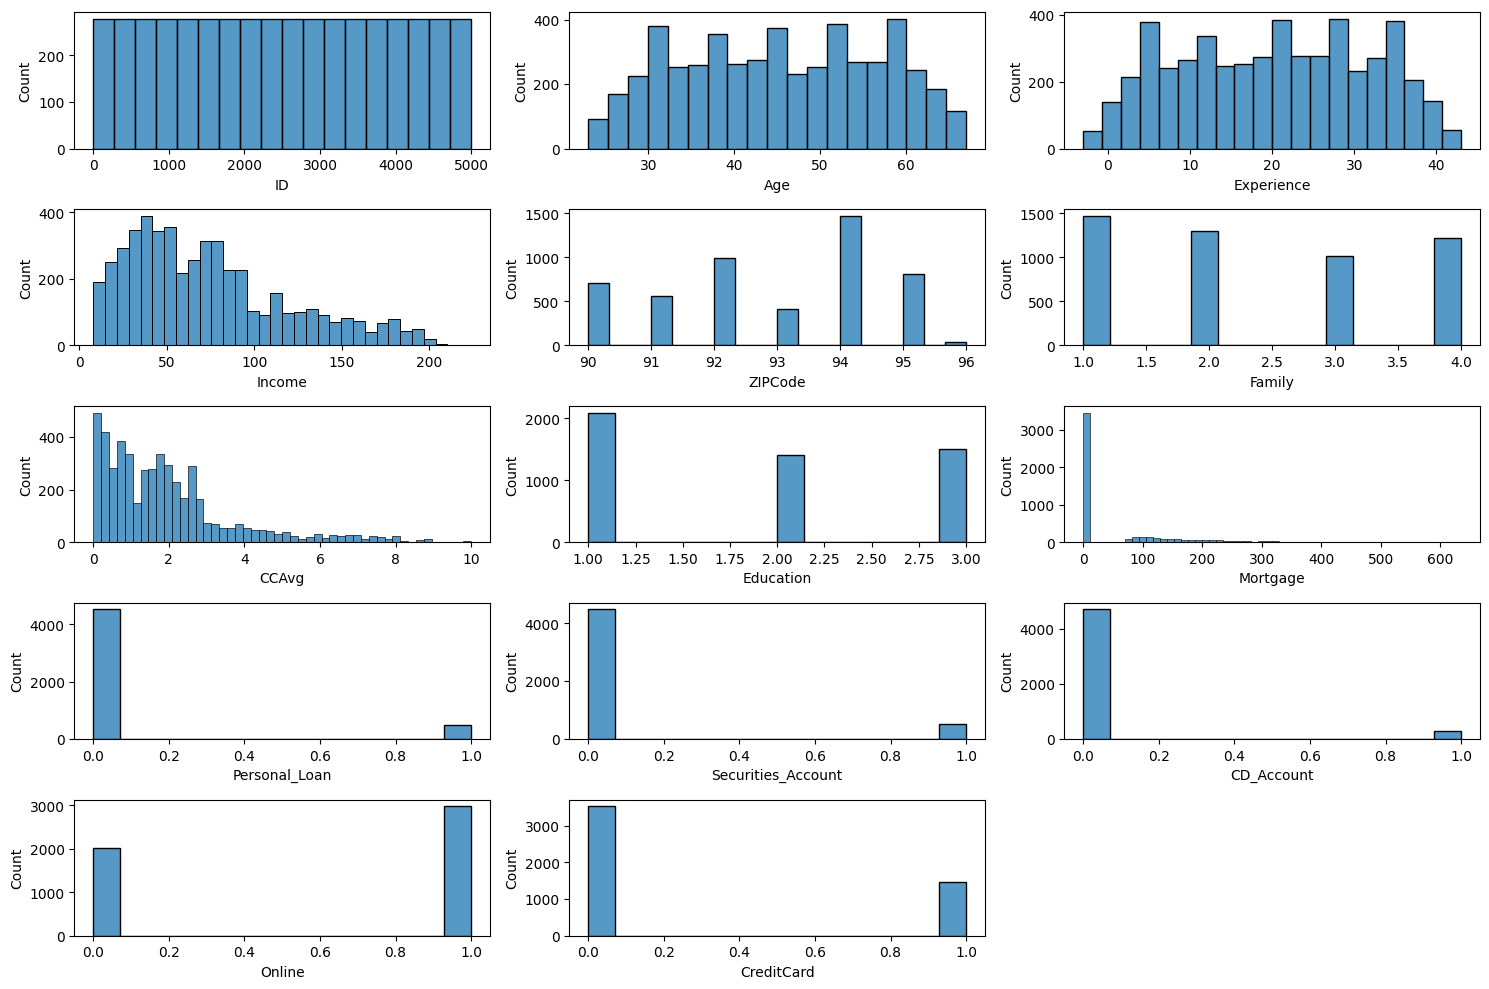

In [19]:
plt.figure(figsize = (15, 10))

for i, column in enumerate(columns):
  plt.subplot(5, 3, i + 1)
  sns.histplot(data = data, x = column)
plt.tight_layout();

- Annual Income, CCAvg(spending on credit cards) and Mortgage exhibit a right-skewed distribution.
- The numbers of Undergrad's are higher
- The customers who used online(internet banking) are higher
- Most customers doesn't have other bank credit card
- There is high purchasing in the area of 94  zipcode and lowest purchase in 96

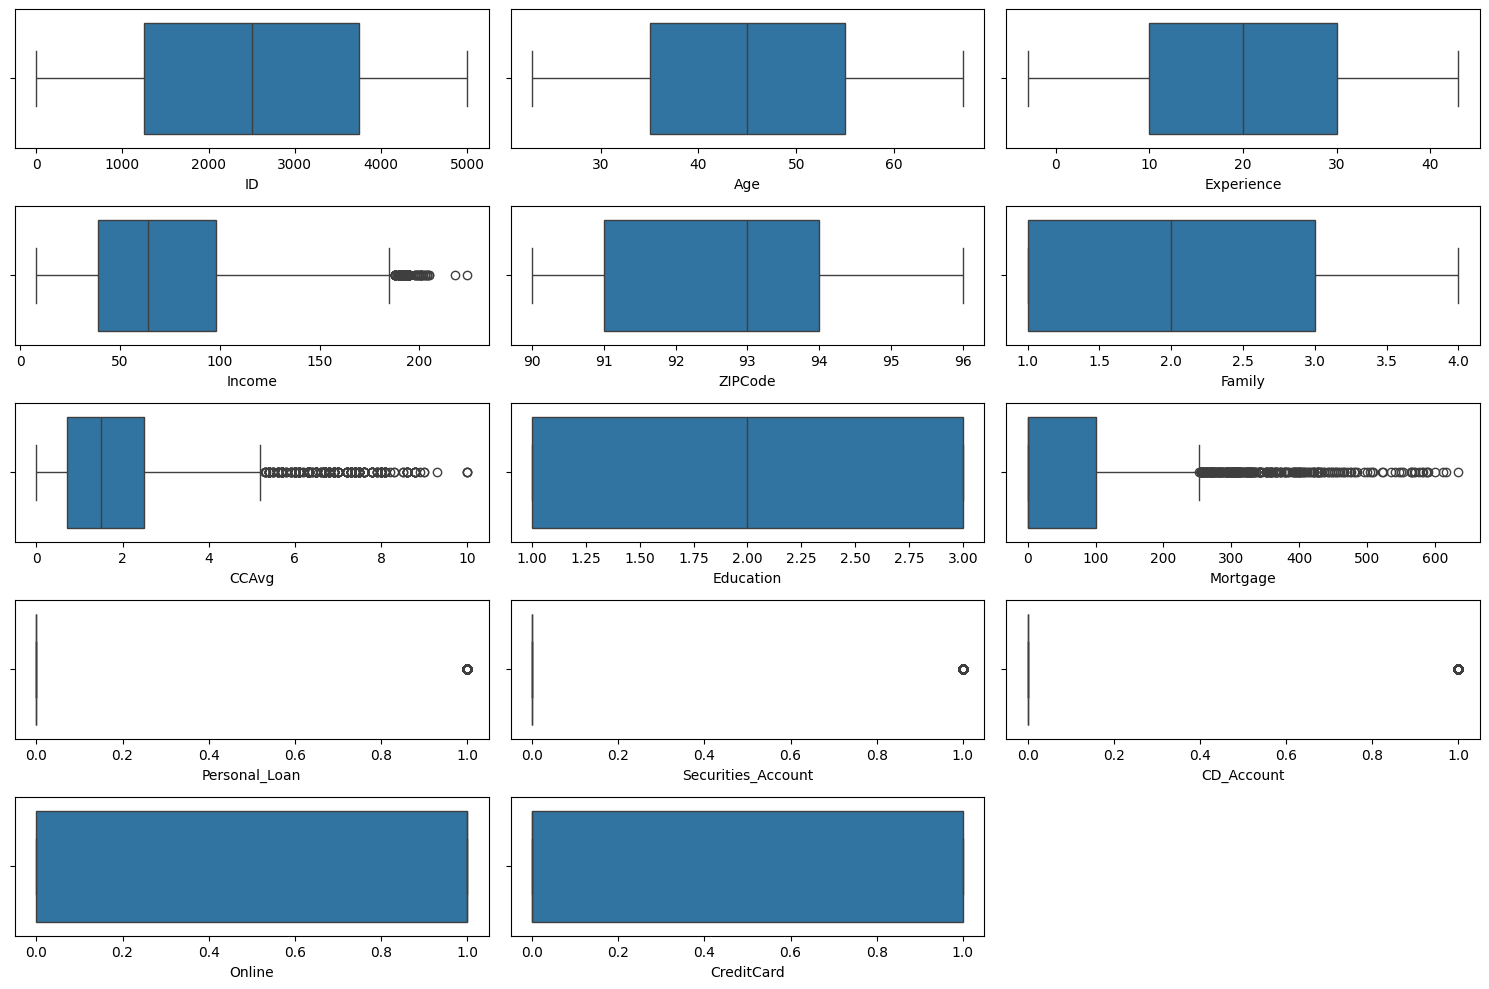

In [20]:
plt.figure(figsize = (15, 10))

for i, column in enumerate(columns):
  plt.subplot(5, 3, i + 1)
  sns.boxplot(data = data, x = column)
plt.tight_layout();

- There are outliers in Annual Income, CCAvg(spending on credit cards) and Mortgage  attributes in the data.

Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64 



<Axes: xlabel='Personal_Loan', ylabel='count'>

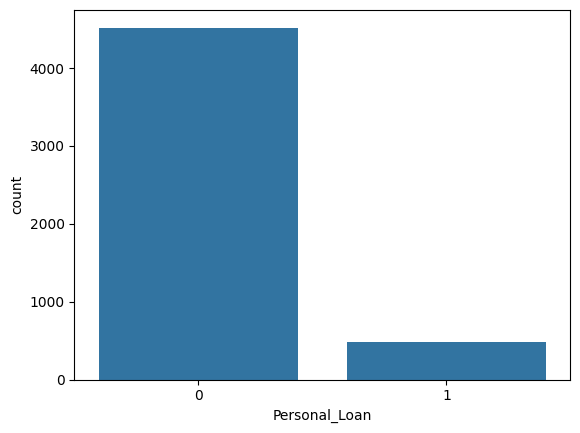

In [21]:
print(100 * data['Personal_Loan'].value_counts(normalize = True), '\n')
sns.countplot(data = data, x = 'Personal_Loan')

- 9.6% of the personal loan  in the data have been purchased.

CreditCard
0    70.6
1    29.4
Name: proportion, dtype: float64 



<Axes: xlabel='CreditCard', ylabel='count'>

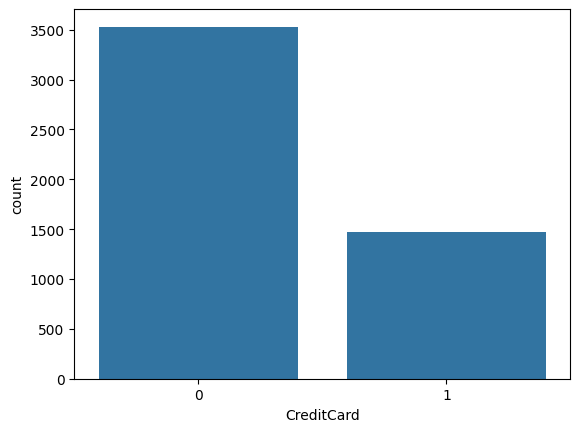

In [22]:
print(100 * data['CreditCard'].value_counts(normalize = True), '\n')
sns.countplot(data = data, x = 'CreditCard')

- ~70% of the customers have not other banks creditcard; and just 29% haves other banks creditcard.

Bivariate Analysis

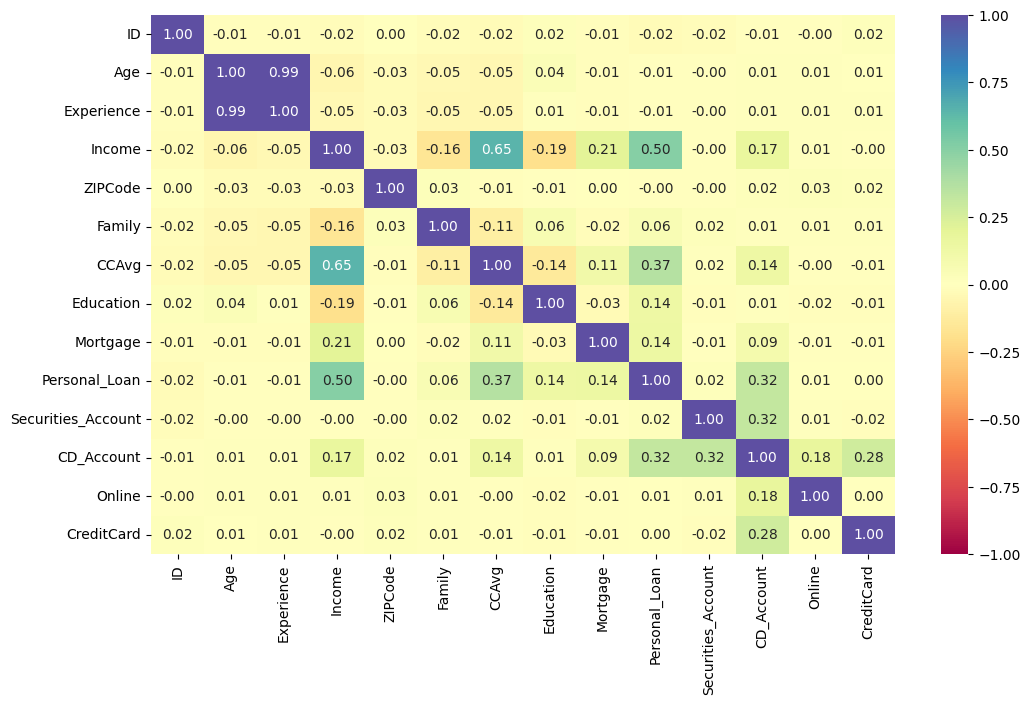

In [23]:
plt.figure(figsize = (12, 7))
sns.heatmap(data[columns].corr(), annot = True, vmin = -1, vmax = 1, fmt = '.2f', cmap = 'Spectral');

- The correlation between personal loan vs CCAvg and CD_account is positive.
- The correlation between annual income and CCAvg ; and also annual income and personal loan is strong positive.
- The correlation between annual income and education ; and also annual income and family size is negative.
- Experience and age have strong positive relationship. But the age and annual incomes are negeative relationship.
- Personal loan and age have weak negative relationship.
- Personal loan and education have weak positive relationship.

<Figure size 1200x700 with 0 Axes>

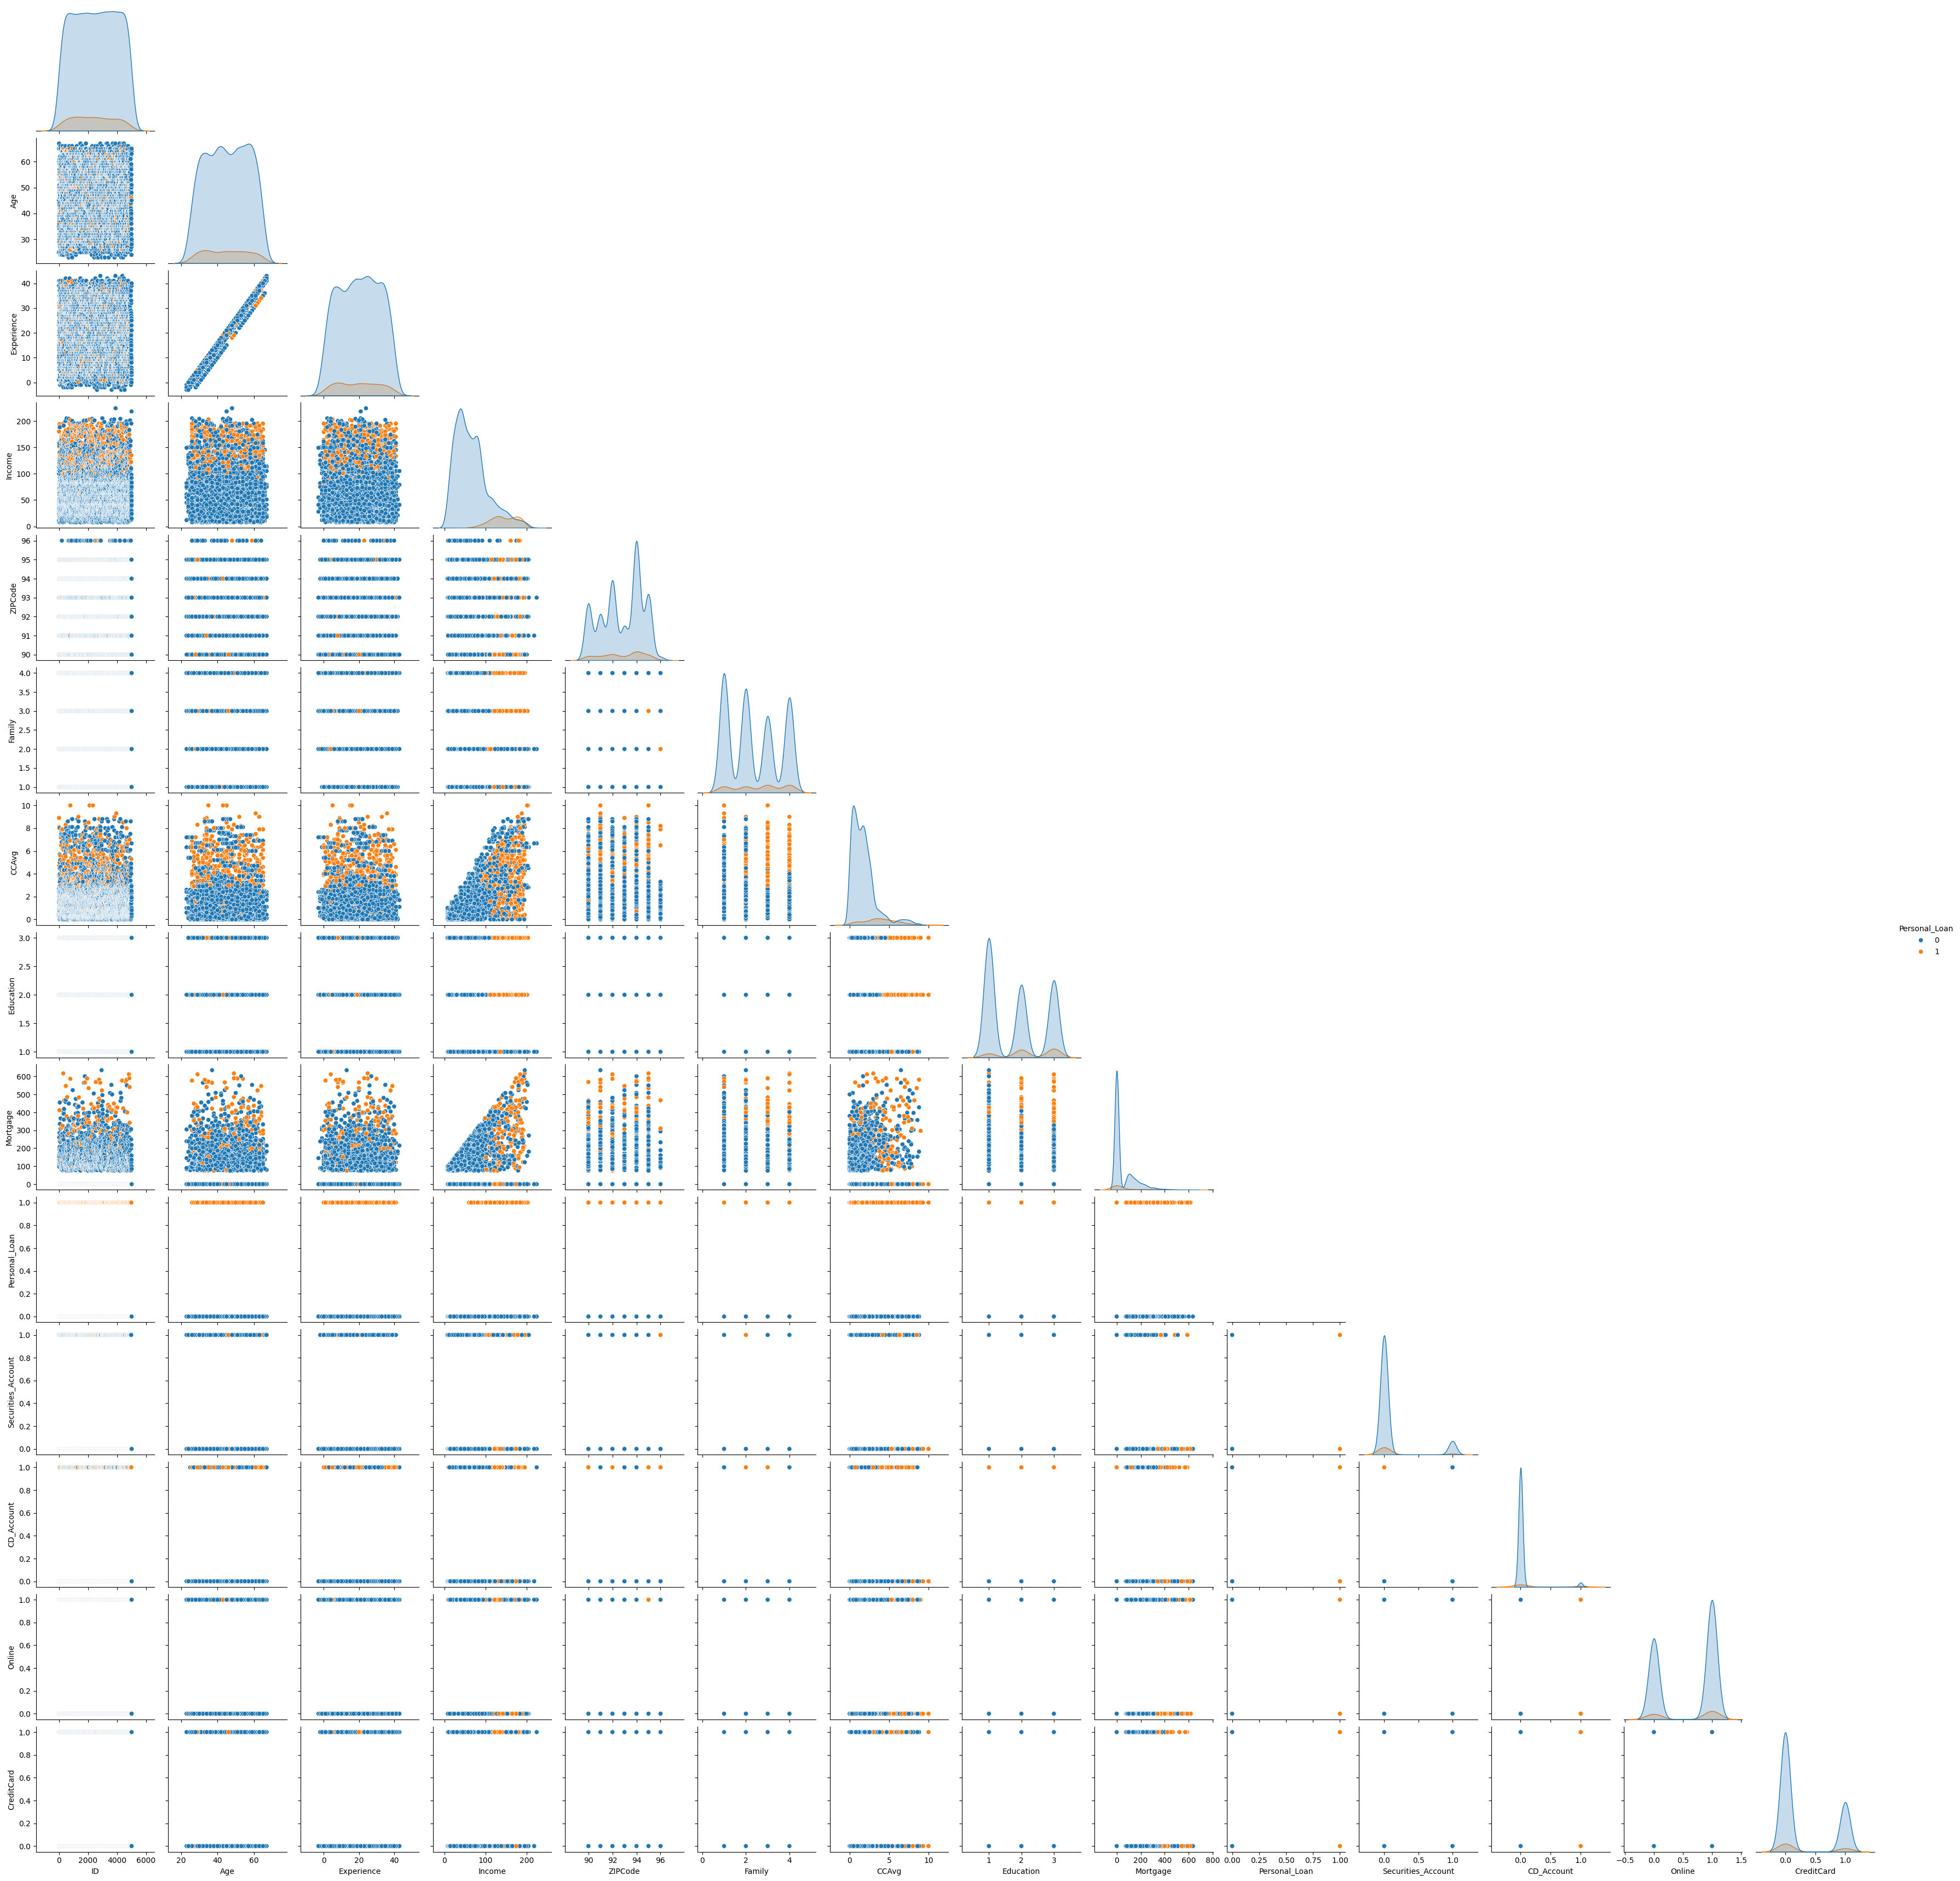

In [24]:
plt.figure(figsize = (12, 7))
sns.pairplot(data, vars = columns, hue = 'Personal_Loan', diag_kind = 'kde', corner = True)

- Customers with a high annual income are more likely to have higher ccAvg(spending on credit card) and mortgage.

<Axes: xlabel='Personal_Loan', ylabel='Age'>

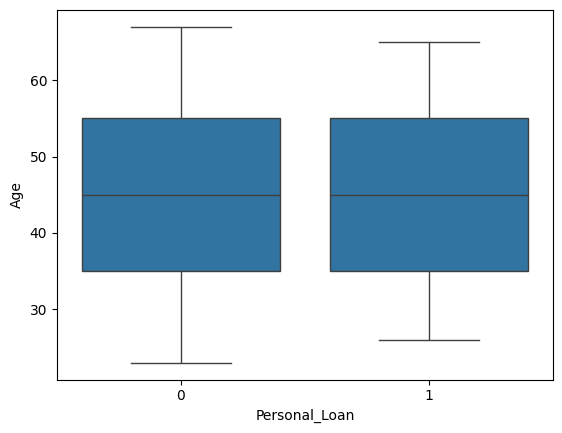

In [25]:
sns.boxplot(data = data, x = 'Personal_Loan', y = 'Age')

- Personal loan doesn't affect much by age.

<Axes: xlabel='Personal_Loan', ylabel='Education'>

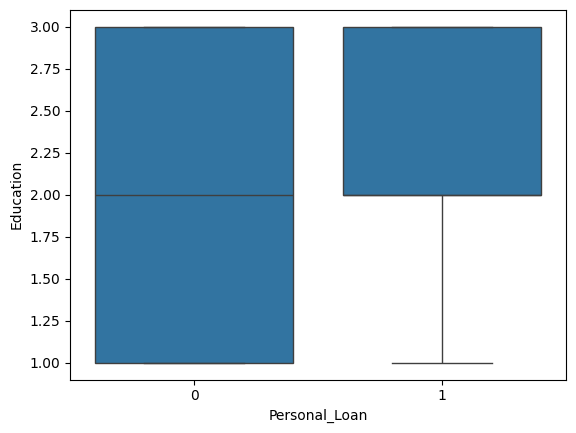

In [26]:
sns.boxplot(data = data, x = 'Personal_Loan', y = 'Education')


- Undergrad customers seems doesn't purchase loan.

<Axes: xlabel='Education', ylabel='Personal_Loan'>

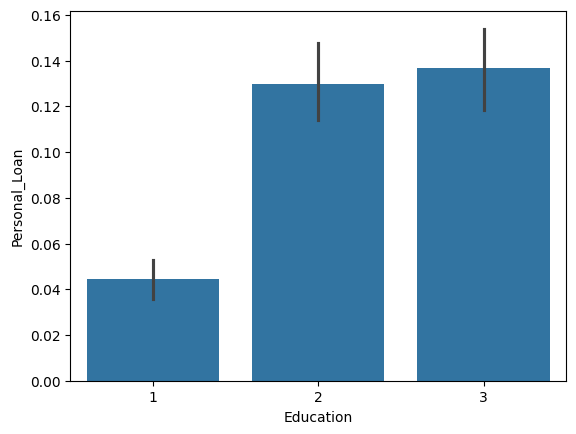

In [27]:
sns.barplot(data = data, y = 'Personal_Loan', x = 'Education')


- Customers with higher education have  higher chances of purchasing personal loan.

Text(0.5, 0, 'Personal_Loan')

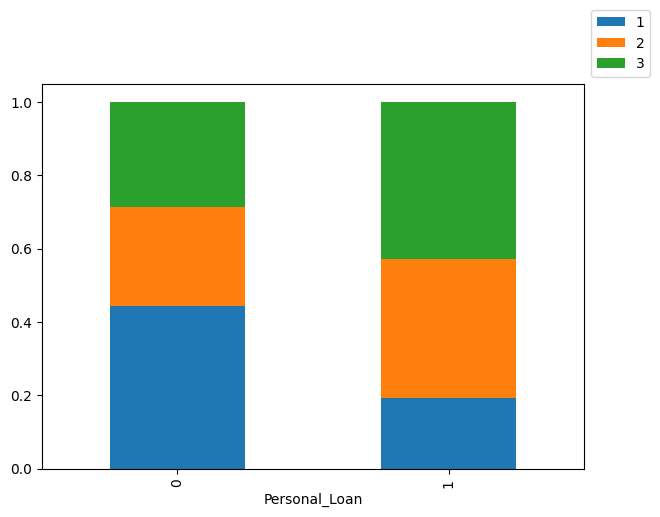

In [28]:
tab = pd.crosstab(
    data['Personal_Loan'],   data['Education'],
    normalize = 'index'
)

tab.plot(kind = 'bar', stacked = True, figsize=(7, 5))
plt.legend(loc = 'lower left', bbox_to_anchor = (1, 1) )
plt.xlabel('Personal_Loan')

- Education with  graduate's and professional's, ~80% of customers purchase more personal loan.
- Undergrad, ~45% of customers doesn't purchase loan.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [29]:
x = data.drop(['Personal_Loan'], axis = 1) # get independent variables
y = data['Personal_Loan'] # get the targeted dependent variable

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size = 0.20,
                                                    stratify = y, random_state = 42) # equally distributed of dataset for training and test

In [31]:
print("Shape of training set:", x_train.shape)
print("Shape of test set:", x_test.shape, '\n')
print("Percentage of classes in training set:")
print(100*y_train.value_counts(normalize=True), '\n')
print("Percentage of classes in test set:")
print(100*y_test.value_counts(normalize=True))

Shape of training set: (4000, 13)
Shape of test set: (1000, 13) 

Percentage of classes in training set:
Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64 

Percentage of classes in test set:
Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64


## Model Building

In [32]:
dtree1 = DecisionTreeClassifier(random_state = 42) # create decision tree model with reproduciblity ability

In [33]:
dtree1.fit(x_train, y_train) # make the data train or learned using the model

DecisionTreeClassifier(random_state=42)

### Model Evaluation Criterion

## Model Performance Improvement

In [34]:
#mpc means model_performance_classification
def mpc(model, predictors, target): # for testing the model performance
  pred = model.predict(predictors)

  acc = accuracy_score(target, pred) # metrics to evaluate model performance
  recall = recall_score(target, pred)
  precision = precision_score(target, pred)
  f1 = f1_score(target, pred)

  perf = pd.DataFrame(
      {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
  )
  return perf

In [35]:
# pcm means plot_confusion_matrix
def pcm(model, predictors, target): # to visualize TP, TN, FP, FN
  predd = model.predict(predictors)
  cm = confusion_matrix(target, predd)
  labels = np.asarray( [
       ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
         for item in cm.flatten()
           ]).reshape(2,2)

  plt.figure(figsize = (6, 4))
  sns.heatmap(cm, annot = labels, fmt = '')
  plt.ylabel("True label")
  plt.xlabel("Predicted label")

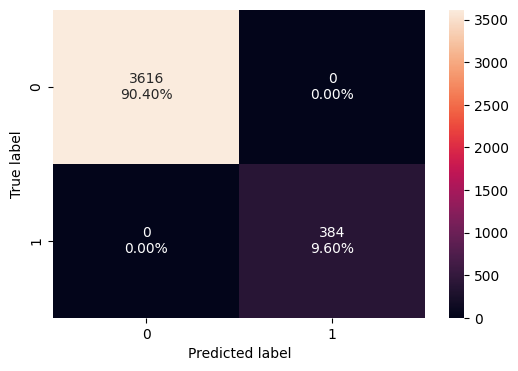

In [36]:
pcm(dtree1, x_train, y_train)

Its perfect model for training with questionable of generalization or overfitting

In [37]:
dtree1_train_perf = mpc(dtree1, x_train, y_train,)
dtree1_train_perf

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

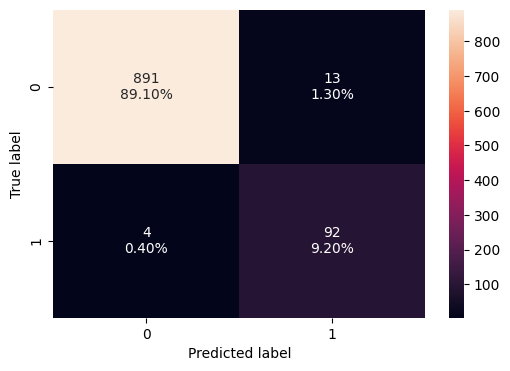

In [38]:
pcm(dtree1, x_test, y_test)


In [39]:
dtree1_test_perf = mpc(dtree1, x_test, y_test,)
dtree1_test_perf

Accuracy    Recall  Precision        F1
0     0.983  0.958333    0.87619  0.915423

- There is a difference between the training and test F1 Scores.
- This indicates that the model is overfitting, since the training f1 score and others performance metrics are perfectly one.

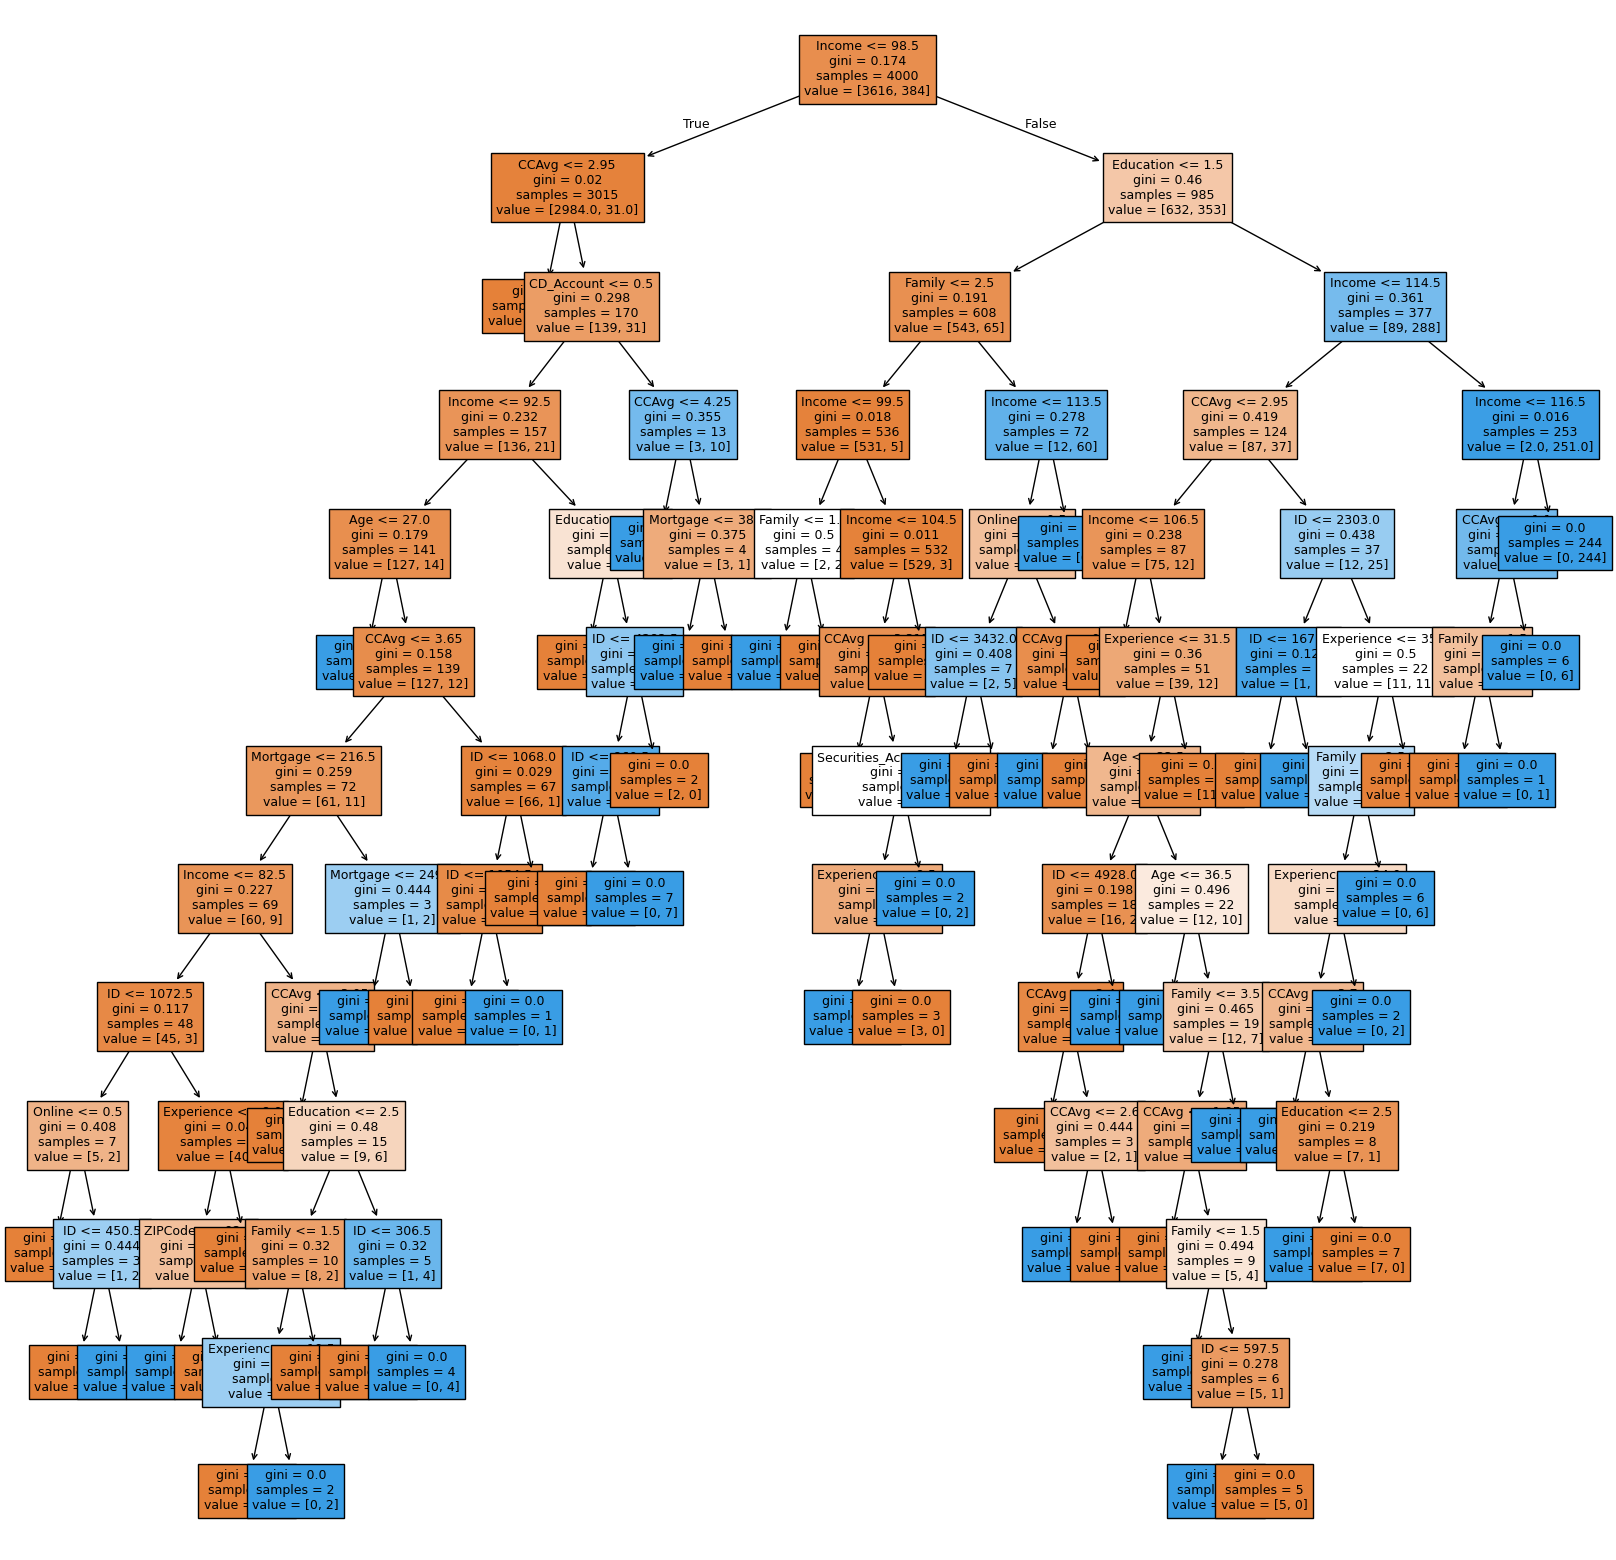

In [40]:
feature_clmnNames = list(x_train.columns)
plt.figure(figsize = (20, 20))

out = tree.plot_tree(
    dtree1,
    feature_names = feature_clmnNames,
    filled = True,
    fontsize = 9,
    node_ids = False,
    class_names = None,
)

for o in out:
  arrow = o.arrow_patch
  if arrow is not None:
    arrow.set_edgecolor("black")
    arrow.set_linewidth(1)

plt.show()


- We can observe that this is a very complex tree.

In [41]:
print(
    tree.export_text(
        dtree1,
        feature_names = feature_clmnNames,
        show_weights = True
    )
)

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2845.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- Age <= 27.00
|   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |--- Age >  27.00
|   |   |   |   |   |--- CCAvg <= 3.65
|   |   |   |   |   |   |--- Mortgage <= 216.50
|   |   |   |   |   |   |   |--- Income <= 82.50
|   |   |   |   |   |   |   |   |--- ID <= 1072.50
|   |   |   |   |   |   |   |   |   |--- Online <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [4.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- Online >  0.50
|   |   |   |   |   |   |   |   |   |   |--- ID <= 450.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- ID >  450.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |   |   |--- ID >  107

Pre-Pruning

In [42]:
# mdv means max_depth_values
# mlnv means max_leaf_nodes_values
# mssv means min_samples_split_values
mdv = np.arange(2, 11, 2) # is about deciding specific values ahead
mlnv = np.arange(10, 51, 10)
mssv = np.arange(10, 51, 10)

best_estimator = None
best_score_diff = float('inf')

for md in mdv:
  for mln in mlnv:
    for mss in mssv:
      estimator = DecisionTreeClassifier(
          max_depth = md,
          max_leaf_nodes = mln,
          min_samples_split = mss,
          random_state = 42
      )
      estimator.fit(x_train, y_train) # fit the data to the model

      y_train_pred = estimator.predict(x_train) # predict for training dataset based on the model
      y_test_pred = estimator.predict(x_test) # predict for test dataset based on the model

      train_f1_score = f1_score(y_train, y_train_pred)
      test_f1_score = f1_score(y_test, y_test_pred)

      score_diff = abs(train_f1_score - test_f1_score) # getting absolute value of the score

      if score_diff < best_score_diff:
        score_diff = score_diff
        best_estimator = estimator


In [43]:
dtree2 = best_estimator
dtree2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=50, min_samples_split=50,
                       random_state=42)

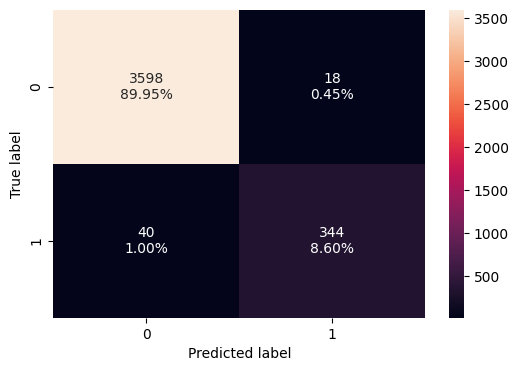

In [44]:
pcm(dtree2, x_train, y_train)

In [45]:
dtree2_train_perf = mpc(dtree2, x_train, y_train)
dtree2_train_perf

Accuracy    Recall  Precision        F1
0    0.9855  0.895833   0.950276  0.922252

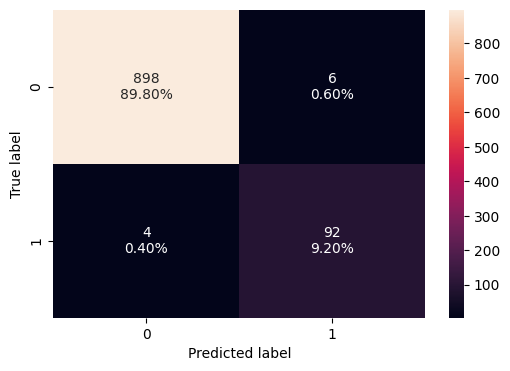

In [46]:
pcm(dtree2, x_test, y_test)


In [47]:
dtree2_test_perf = mpc(dtree2, x_test, y_test)
dtree2_test_perf

Accuracy    Recall  Precision        F1
0      0.99  0.958333   0.938776  0.948454

- The test scores are higher than training scores, indicating a better generalized performance.

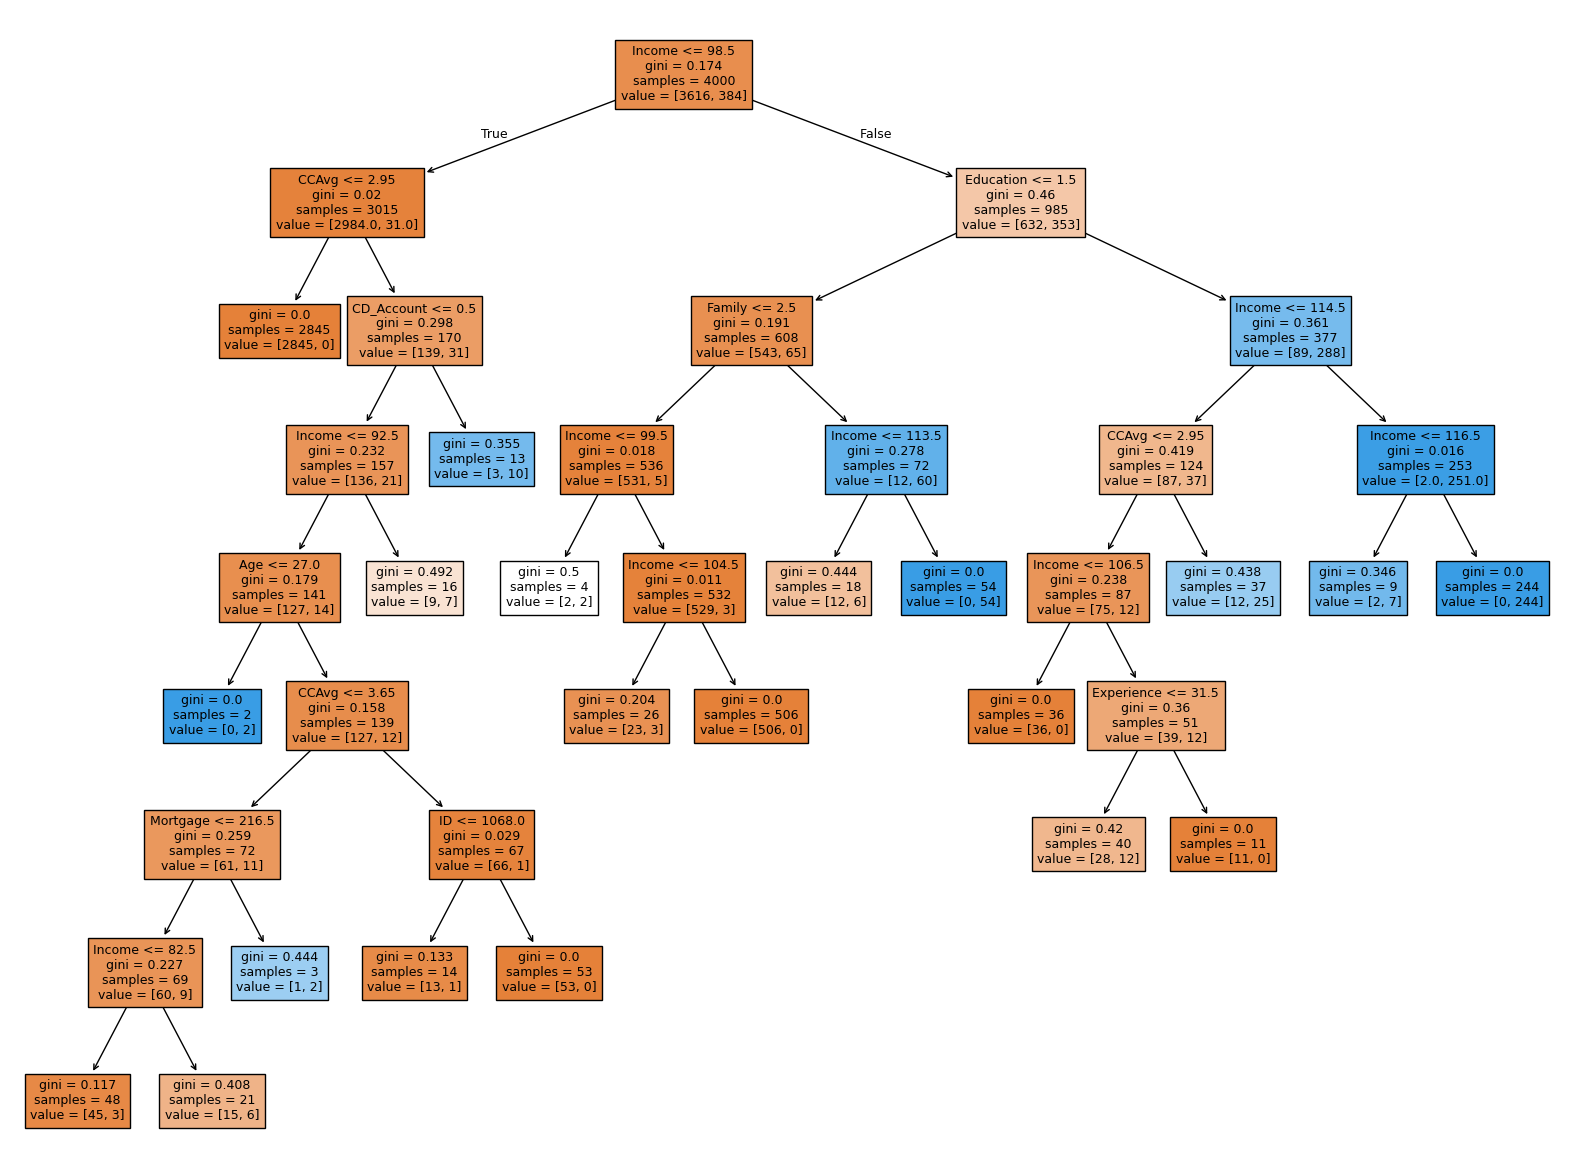

In [48]:
feature_clmnNames = list(x_train.columns)
plt.figure(figsize = (20, 15))

out = tree.plot_tree(
    dtree2,
    feature_names = feature_clmnNames,
    filled = True,
    fontsize = 9,
    node_ids = False,
    class_names = None,
)

for o in out:
  arrow = o.arrow_patch
  if arrow is not None:
    arrow.set_edgecolor("black")
    arrow.set_linewidth(1)

plt.show()


- This is a far less complex tree than the previous one.
- We can observe the decision rules much more clearly in the plot.

In [49]:
print(
    tree.export_text(
        dtree2,
        feature_names = feature_clmnNames,
        show_weights = True
    )
)

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2845.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- Age <= 27.00
|   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |--- Age >  27.00
|   |   |   |   |   |--- CCAvg <= 3.65
|   |   |   |   |   |   |--- Mortgage <= 216.50
|   |   |   |   |   |   |   |--- Income <= 82.50
|   |   |   |   |   |   |   |   |--- weights: [45.00, 3.00] class: 0
|   |   |   |   |   |   |   |--- Income >  82.50
|   |   |   |   |   |   |   |   |--- weights: [15.00, 6.00] class: 0
|   |   |   |   |   |   |--- Mortgage >  216.50
|   |   |   |   |   |   |   |--- weights: [1.00, 2.00] class: 1
|   |   |   |   |   |--- CCAvg >  3.65
|   |   |   |   |   |   |--- ID <= 1068.00
|   |   |   |   |   |   |   |--- weights: [13.00, 1.00] class: 0
|   |   |   |   |   |   |--- ID >  1068.00
|   |   |   |   |   |   |   |--- weights: [53.00, 0.00] class: 0
|   |  

Post-Pruning

In [50]:
clf = DecisionTreeClassifier(random_state = 42) # creating instance of the model

path = clf.cost_complexity_pruning_path(x_train, y_train) # find all availiable alpha or cost complixty in our training data

ccp_alphas = abs(path.ccp_alphas)

impurities = path.impurities # also getting the impurities corresponding to the alphas

In [51]:
pd.DataFrame(path).head()

ccp_alphas  impurities
0    0.000000    0.000000
1    0.000235    0.000471
2    0.000244    0.000958
3    0.000246    0.001451
4    0.000306    0.002369

In [52]:
pd.DataFrame(path).shape

(38, 2)

We have 38 of alphas wrt our model and training dataset

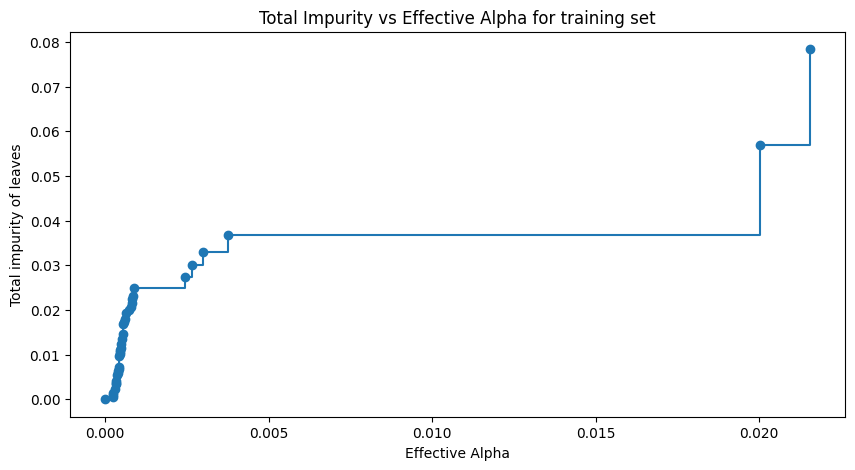

In [53]:
fig, ax = plt.subplots(figsize = (10, 5))

ax.plot(ccp_alphas[:-1], impurities[:-1], marker = 'o', drawstyle = 'steps-post')

ax.set_xlabel('Effective Alpha')
ax.set_ylabel('Total impurity of leaves')
ax.set_title('Total Impurity vs Effective Alpha for training set');

- The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the corresponding tree with one node.

In [54]:
clfs = []

for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(ccp_alpha = ccp_alpha, random_state = 42)
  clf.fit(x_train, y_train)
  clfs.append(clf)
print(
    "Number of nodes in the last tree is {} with ccp_alpha {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is 1 with ccp_alpha 0.04760359071815693


## Model Performance Comparison and Final Model Selection

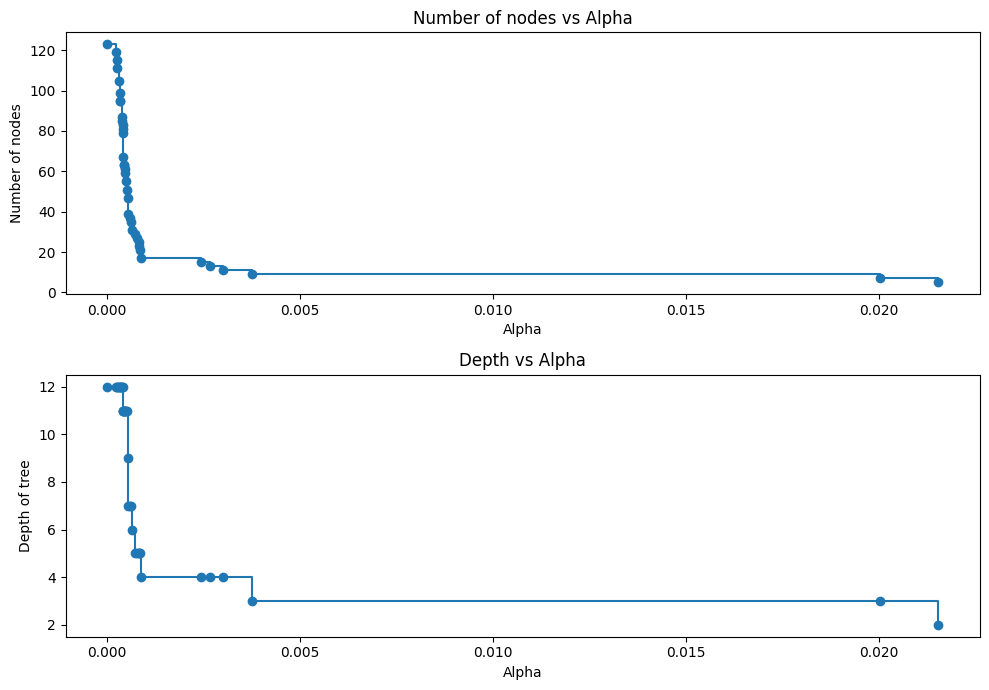

In [55]:
clfsU = clfs[:-1] # excluding the last alpha value which pruned all the tree
ccp_alphasU = ccp_alphas[:-1]

node_countsU = [clf.tree_.node_count for clf in clfsU]
depthU = [clf.tree_.max_depth for clf in clfsU]

fig, ax = plt.subplots(2,1, figsize = (10,7))

ax[0].plot(ccp_alphasU, node_countsU, marker="o", drawstyle="steps-post")

#ax[0].plot(ccp_alphas, node_counts, marker = 'o', drawstyle = 'steps-post')
ax[0].set_xlabel('Alpha')
ax[0].set_ylabel('Number of nodes')
ax[0].set_title("Number of nodes vs Alpha")

ax[1].plot(ccp_alphasU, depthU, marker = 'o', drawstyle = 'steps-post')
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Depth of tree")
ax[1].set_title("Depth vs Alpha")

fig.tight_layout()

We prefer comparatively small number of nodes, depth and alpha. On which the line starts stablized or uniform.

In [56]:
train_f1_scores = [] # empty list to store our next calculated scores for the training and test

for clf in clfsU:
  pred_train = clf.predict(x_train)
  f1_train = f1_score(y_train, pred_train)
  train_f1_scores.append(f1_train)

In [57]:
test_f1_scores = []

for clf in clfsU:
  pred_test = clf.predict(x_test)
  f1_test = f1_score(y_test, pred_test)
  test_f1_scores.append(f1_test)

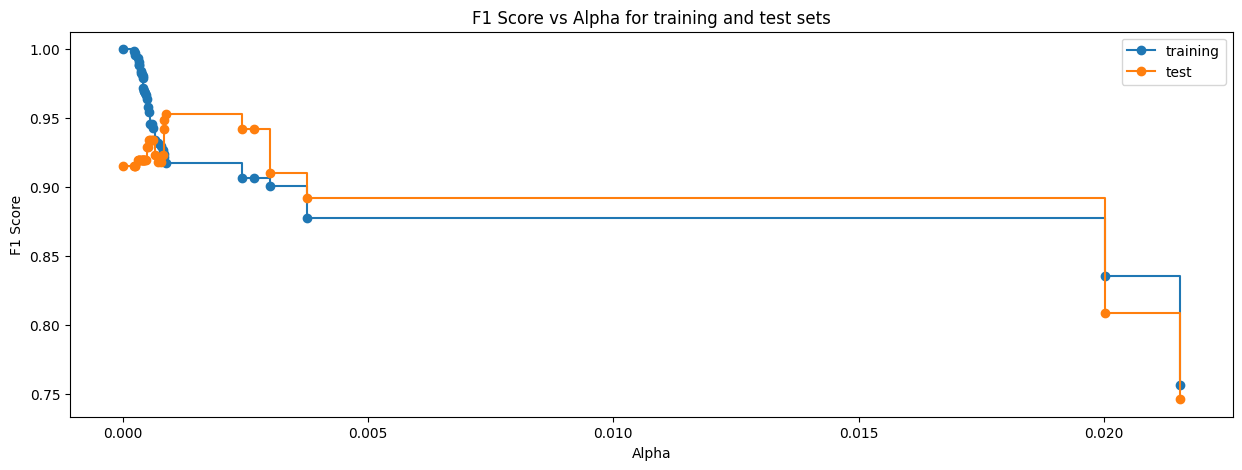

In [58]:
fig, ax = plt.subplots(figsize = (15, 5))
ax.set_xlabel("Alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs Alpha for training and test sets")

ax.plot(ccp_alphasU, train_f1_scores, marker = 'o', label = 'training', drawstyle = 'steps-post')
ax.plot(ccp_alphasU, test_f1_scores, marker = 'o', label = 'test', drawstyle = 'steps-post')

ax.legend();

We prefer high f1_score with low alpha, on which the line start stablized or uniform

In [59]:
index_best_model = np.argmax(test_f1_scores) # getting the maximum f1_score point

In [60]:
dtree3 = clfsU[index_best_model] # assign to the model name
print(dtree3)

DecisionTreeClassifier(ccp_alpha=0.0008702884311333967, random_state=42)


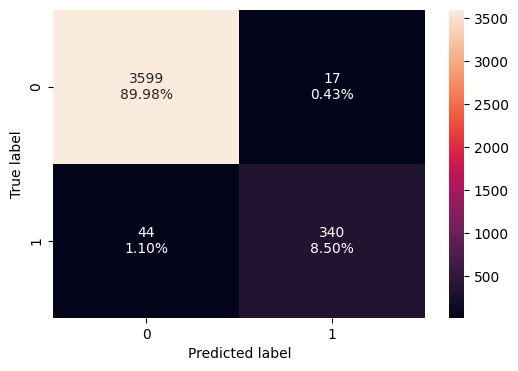

In [61]:
pcm(dtree3, x_train, y_train)

In [62]:
dtree3_train_perf = mpc(dtree3, x_train, y_train)
dtree3_train_perf

Accuracy    Recall  Precision        F1
0   0.98475  0.885417   0.952381  0.917679

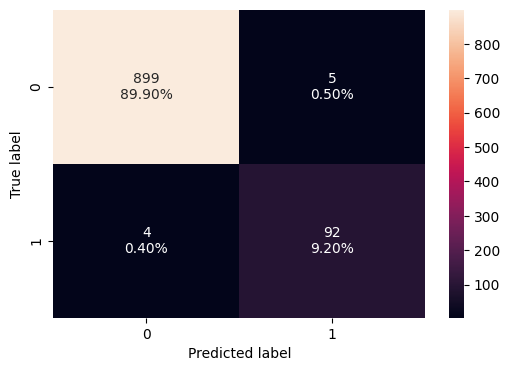

In [63]:
pcm(dtree3, x_test, y_test)

In [64]:
dtree3_test_perf = mpc(dtree3, x_test, y_test)
dtree3_test_perf

Accuracy    Recall  Precision        F1
0     0.991  0.958333   0.948454  0.953368

- The test score is greater than the training score, indicating a generalized performance.

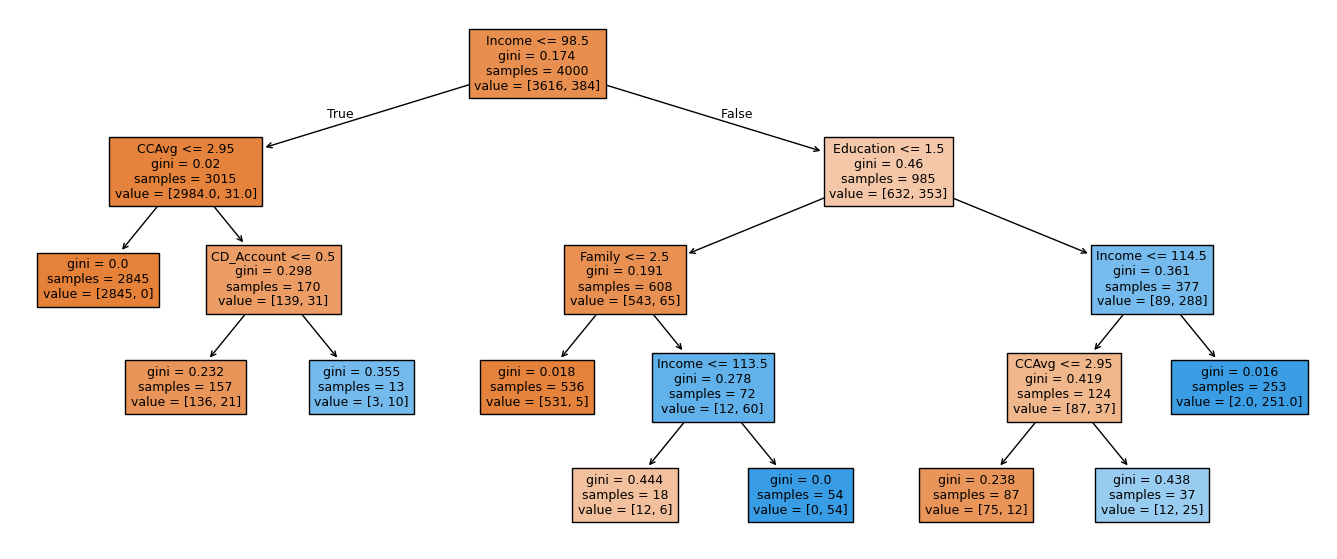

In [65]:
feature_clmnNames = list(x_train.columns)
plt.figure(figsize = (17, 7))

out = tree.plot_tree(
    dtree3,
    feature_names = feature_clmnNames,
    filled = True,
    fontsize = 9,
    node_ids = False,
    class_names = None,
)

for o in out:
  arrow = o.arrow_patch
  if arrow is not None:
    arrow.set_edgecolor("black")
    arrow.set_linewidth(1)

plt.show()

- This is a far less complex tree than the previous one.
- The model used only income, ccAvg, cd_account, education, and family to determine whether the customer will be purchase personal loan or not. (not like pre-pruning using more features like morgage, age and experience)

In [66]:
print(
    tree.export_text(
        dtree3,
        feature_names = feature_clmnNames,
        show_weights = True
    )
)

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2845.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- weights: [136.00, 21.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [3.00, 10.00] class: 1
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [531.00, 5.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- Income <= 113.50
|   |   |   |   |--- weights: [12.00, 6.00] class: 0
|   |   |   |--- Income >  113.50
|   |   |   |   |--- weights: [0.00, 54.00] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 114.50
|   |   |   |--- CCAvg <= 2.95
|   |   |   |   |--- weights: [75.00, 12.00] class: 0
|   |   |   |--- CCAvg >  2.95
|   |   |   |   |--- weights: [12.00, 25.00] class: 1
|   |   |--- Income >  114.50
|   |   |   |--- weights: [2.00, 251.00] class: 1



In [103]:
models_train_comp_df = pd.concat([ # to concatinate the models as a column for comparing
    dtree1_train_perf.T,
    dtree2_train_perf.T,
    dtree3_train_perf.T],
    axis = 1
)

models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree (sklearn default)  Decision Tree (Pre-Pruning)  \
Accuracy                               1.0                     0.985500   
Recall                                 1.0                     0.895833   
Precision                              1.0                     0.950276   
F1                                     1.0                     0.922252   

           Decision Tree (Post-Pruning)  
Accuracy                       0.984750  
Recall                         0.885417  
Precision                      0.952381  
F1                             0.917679

In [68]:
models_test_comp_df = pd.concat(
    [
        dtree1_test_perf.T,
        dtree2_test_perf.T,
        dtree3_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Decision Tree (sklearn default)  Decision Tree (Pre-Pruning)  \
Accuracy                          0.983000                     0.990000   
Recall                            0.958333                     0.958333   
Precision                         0.876190                     0.938776   
F1                                0.915423                     0.948454   

           Decision Tree (Post-Pruning)  
Accuracy                       0.991000  
Recall                         0.958333  
Precision                      0.948454  
F1                             0.953368

- Both the pre-pruned and post-pruned decision trees exhibit generalized performances.

- The post-pruned decision tree has an approx. better performance on the test set than the training set.
    - This model uses few features for decision-making.
    - This will result in a low prediction time but it might not be able to perform well on edge cases in unseen data.

- The pre-pruned decision tree has also an approx. better performance on the test set than the training set.
    - This model uses a few more features for decision-making than the post-pruned decision tree.
    - This will result in a slightly longer prediction time but it is likely to yield better results on unseen data.

- We'll move ahead with the pre-pruned decision tree as our final model.

Feature Importance

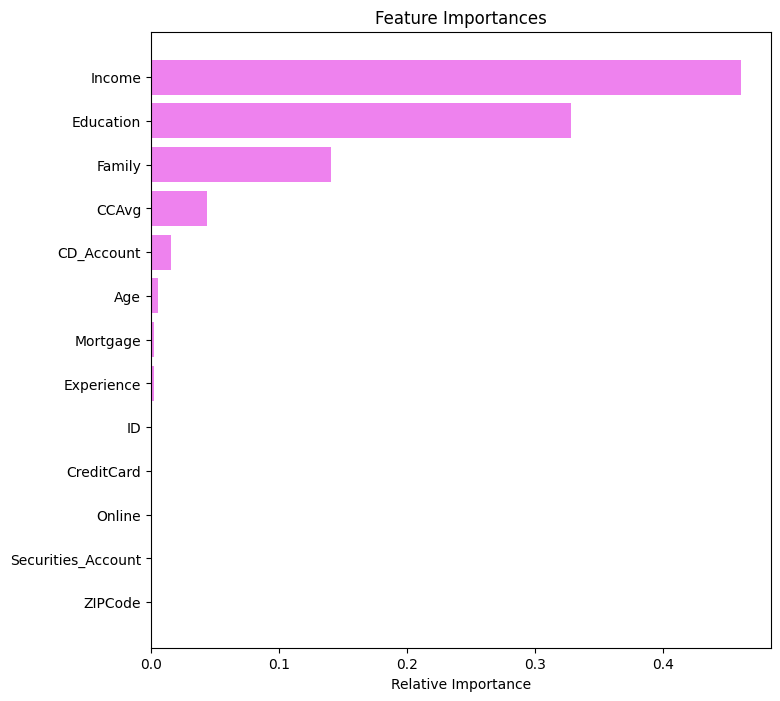

In [69]:
importance = dtree2.feature_importances_
indexs = np.argsort(importance)
plt.figure(figsize = (8,8))
plt.title("Feature Importances")

plt.barh(range(len(indexs)), importance[indexs], color = 'violet', align = 'center')

plt.yticks(range(len(indexs)), [feature_clmnNames[i] for i in indexs])

plt.xlabel("Relative Importance")
plt.show()

- Income and education are the most influential attributes in determining purchasing personal loan.
- Family and ccAvg are the next best attributes to consider.

In [105]:
%%time
appl_detail = x_test.iloc[:1, :]
loanRecivPred = dtree2.predict(appl_detail)
print(loanRecivPred)

[0]
CPU times: user 7.08 ms, sys: 5 µs, total: 7.09 ms
Wall time: 11.3 ms


- The model was able to predict in under half a second.

In [106]:
reciv_likelihood = dtree2.predict_proba(appl_detail)
print(reciv_likelihood[0, 1])

0.0


- This indicates that the model is 0% confident that the customer is purchasing personal loan.

## Bussiness Recomendations

- The bank can deploy this model to predict whether a liability customer will buy personal loans or not
- This would reduce the overall time for the initial processing.

Regression

In [72]:
ind_var1 = ['Income']
lin_reg1 = LinearRegression()


In [73]:
lin_reg1.fit(x_train, y_train)


LinearRegression()

In [74]:
lin_reg1.fit(x_train[ind_var1], y_train)

LinearRegression()

In [75]:
print('Coeffient:', lin_reg1.coef_,
      'Intercept:', lin_reg1.intercept_)

Coeffient: [0.0031633] Intercept: -0.1364385755512568


In [76]:
print(
    "Personal Loan =",
     "(", lin_reg1.coef_[0], ")", "*", ind_var1[0],
      "+", lin_reg1.intercept_,
)

Personal Loan = ( 0.0031633011210742664 ) * Income + -0.1364385755512568


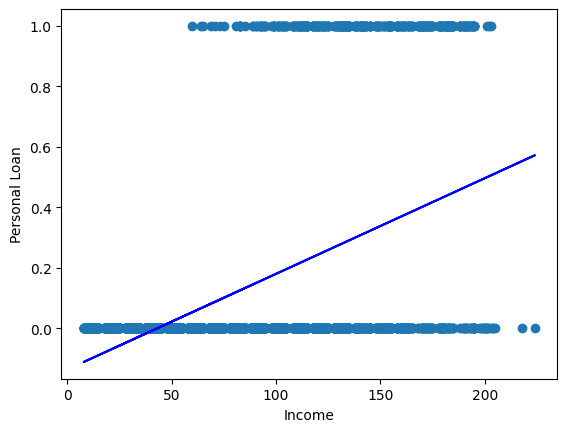

In [77]:
pred_val1 = lin_reg1.predict(x_train[ind_var1])


plt.scatter(x_train[ind_var1], y_train)
plt.plot(x_train[ind_var1], pred_val1, color='blue')
plt.xlabel(ind_var1[0])
plt.ylabel('Personal Loan')
plt.show()

As we see Linear regression model is not much helpful to predict such types of data

## K-means Clustering

In [78]:
scaler = StandardScaler() # standardize all numerical columns
scaled_data = pd.DataFrame(scaler.fit_transform(data))
scaled_data.head()

0         1         2         3         4         5         6   \
0 -1.731704 -1.774417 -1.666078 -0.538229 -1.057687  1.397414 -0.193385   
1 -1.731012 -0.029524 -0.096330 -0.864109 -1.645617  0.525991 -0.250611   
2 -1.730319 -0.552992 -0.445163 -1.363793  0.706104 -1.216855 -0.536736   
3 -1.729626 -0.901970 -0.968413  0.569765  0.706104 -1.216855  0.436091   
4 -1.728933 -0.901970 -1.055621 -0.625130 -1.057687  1.397414 -0.536736   

         7         8         9         10       11        12        13  
0 -1.049078 -0.555524 -0.325875  2.928915 -0.25354 -1.216618 -0.645314  
1 -1.049078 -0.555524 -0.325875  2.928915 -0.25354 -1.216618 -0.645314  
2 -1.049078 -0.555524 -0.325875 -0.341423 -0.25354 -1.216618 -0.645314  
3  0.141703 -0.555524 -0.325875 -0.341423 -0.25354 -1.216618 -0.645314  
4  0.141703 -0.555524 -0.325875 -0.341423 -0.25354 -1.216618  1.549632

In [79]:
scaled_data.describe()

0             1             2             3             4   \
count  5000.000000  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03   
mean      0.000000 -2.131628e-18 -1.179501e-16  1.449507e-16 -3.863221e-15   
std       1.000100  1.000100e+00  1.000100e+00  1.000100e+00  1.000100e+00   
min      -1.731704 -1.948906e+00 -2.014911e+00 -1.428969e+00 -1.645617e+00   
25%      -0.865852 -9.019702e-01 -8.812043e-01 -7.554825e-01 -1.057687e+00   
50%       0.000000 -2.952359e-02 -9.121982e-03 -2.123482e-01  1.181740e-01   
75%       0.865852  8.429230e-01  8.629604e-01  5.263146e-01  7.061043e-01   
max       1.731704  1.889859e+00  1.996667e+00  3.263712e+00  1.881965e+00   

                 5             6             7             8             9   \
count  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03   
mean   1.001865e-16 -6.394885e-17  2.557954e-17 -5.613288e-17 -4.973799e-17   
std    1.000100e+00  1.000100e+00  1.000100e+00  1.000100e+00  1.000100e+00   
min   -1.216855e+00 -1.108987e+00 -1.049078e+00 -5.555239e-01 -3.258753e-01   
25%   -1.216855e+00 -7.084116e-01 -1.049078e+00 -5.555239e-01 -3.258753e-01   
50%   -3.454321e-01 -2.506106e-01  1.417029e-01 -5.555239e-01 -3.258753e-01   
75%    5.259909e-01  3.216407e-01  1.332484e+00  4.375576e-01 -3.258753e-01   
max    1.397414e+00  4.613525e+00  1.332484e+00  5.688108e+00  3.068659e+00   

                 10            11            12            13  
count  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03  
mean  -2.273737e-17  2.131628e-17  4.121148e-17  7.105427e-18  
std    1.000100e+00  1.000100e+00  1.000100e+00  1.000100e+00  
min   -3.414233e-01 -2.535403e-01 -1.216618e+00 -6.453143e-01  
25%   -3.414233e-01 -2.535403e-01 -1.216618e+00 -6.453143e-01  
50%   -3.414233e-01 -2.535403e-01  8.219509e-01 -6.453143e-01  
75%   -3.414233e-01 -2.535403e-01  8.219509e-01  1.549632e+00  
max    2.928915e+00  3.944146e+00  8.219509e-01  1.549632e+00

In [80]:
tsne = TSNE(n_components = 2, n_jobs = -2, random_state = RS) # dimensional reduction from 14 to 2
tsne_Red_da = tsne.fit_transform(scaled_data)
tsne_2d_da = pd.DataFrame(tsne_Red_da, columns = ['feature1', 'feature2'])

In [81]:
tsne_2d_da.head()


feature1   feature2
0  51.068604 -27.018772
1  52.783398 -32.427017
2   6.905378 -30.940266
3  11.282894 -38.464287
4  26.093449  16.962694

<Axes: xlabel='feature1', ylabel='feature2'>

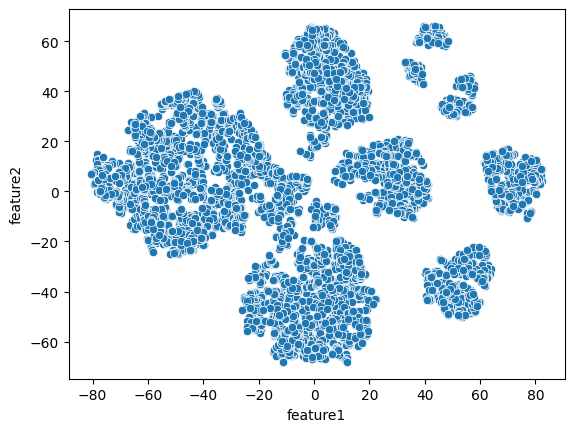

In [82]:
sns.scatterplot(data = tsne_2d_da, x ='feature1', y = 'feature2') # visualize in two dim

- We can roughly see 6 or 7 clusters in the data. So Let's try out different values of perplexity.

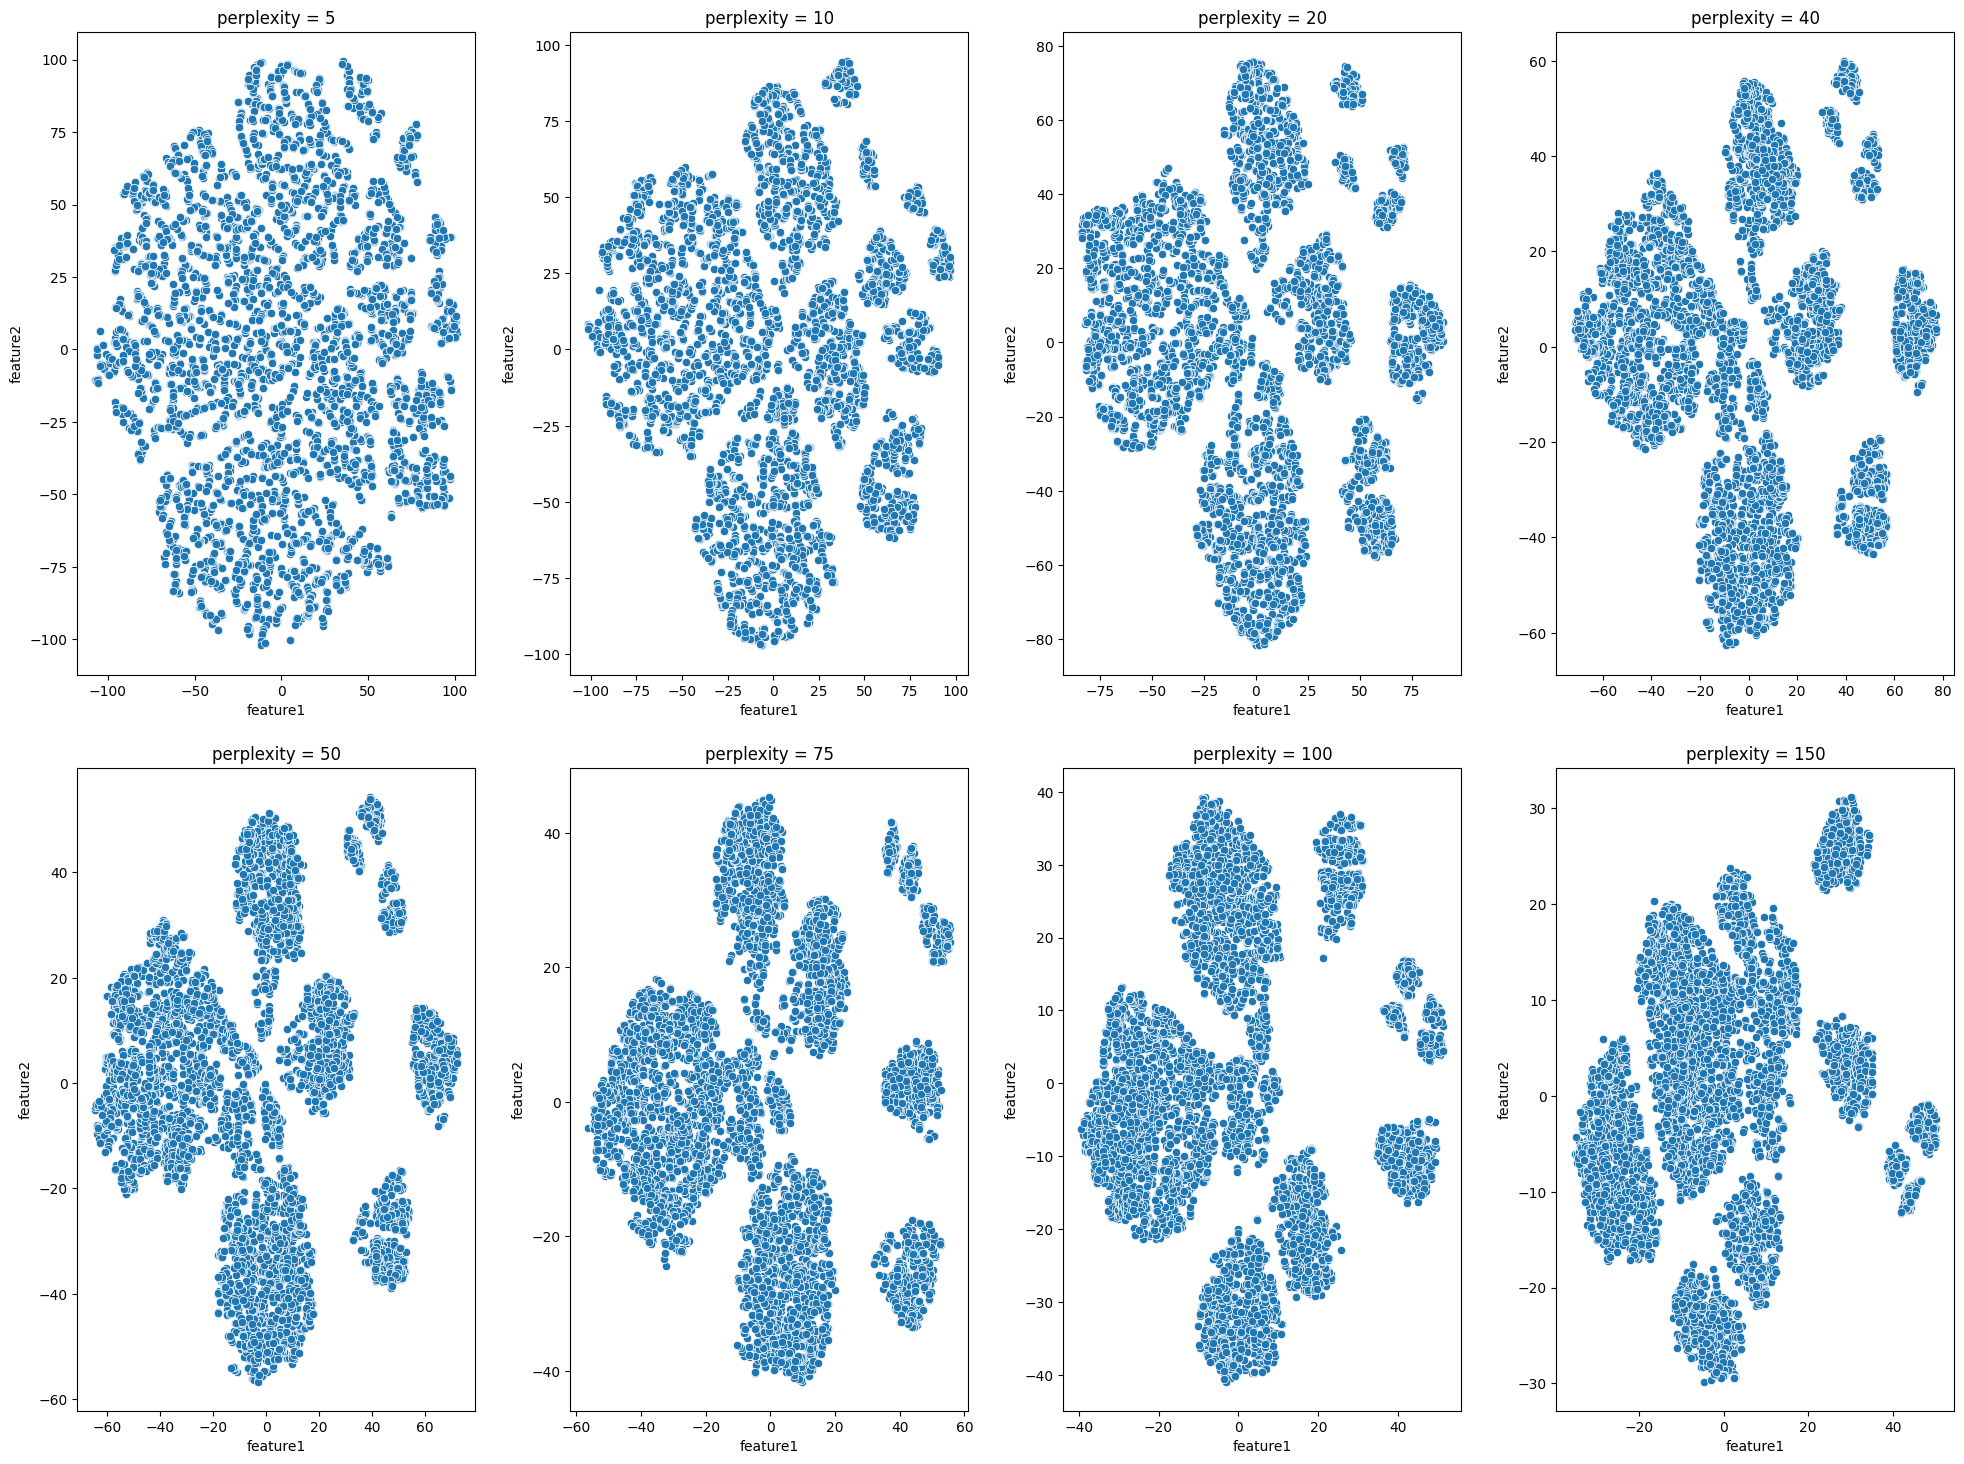

In [123]:
prplxts = [5, 10, 20, 40, 50, 75, 100, 150]
plt.figure(figsize = (20, 15))

for i in range(len(prplxts)):
  tsne = TSNE(n_components = 2, perplexity = prplxts[i], n_jobs = -2, random_state = RS)
  red_da = tsne.fit_transform(scaled_data)
  red_da_df = pd.DataFrame(data = red_da, columns = ['feature1', 'feature2'])
  plt.subplot(2, 4, i + 1)
  plt.title('perplexity = ' + str(prplxts[i]))
  sns.scatterplot(data = red_da_df, x = 'feature1', y = 'feature2')
  plt.tight_layout(pad = 2)
plt.show()


- The data seems to exhibit a good visual separation for perplexity=50, and we can roughly see 6 or 7 clusters in it.
- We'll go ahead with this perplexity value.

In [ ]:
tsneP = TSNE(n_components = 2, perplexity = 50, n_jobs = -2, random_state = RS)
tsne_redP_da = tsneP.fit_transform(scaled_data)
tsne_2dP_da_df = pd.DataFrame(tsne_redP_da, columns = ['feature1', 'feature2'])
tsne_2dP_da_df.head()

<Axes: xlabel='feature1', ylabel='feature2'>

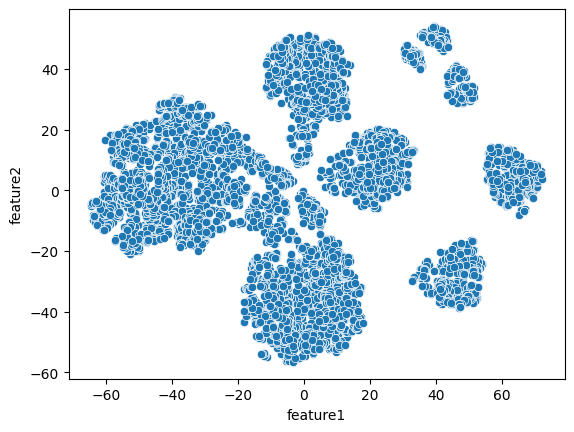

In [125]:
sns.scatterplot(data = tsne_2dP_da_df, x = 'feature1', y = 'feature2')


In [86]:
n_clus = 7
kmeans_7 = KMeans(n_clusters = n_clus, random_state = RS)
kmeans_7.fit(scaled_data)


KMeans(n_clusters=7, random_state=0)

In [87]:
wcss_k7 = kmeans_7.inertia_ # calculating of within cluster squared sum using inertia
print('wcss for k = {} is {}'.format(n_clus, wcss_k7))

wcss for k = 7 is 44661.69996183446


In [88]:
silh_sc_k7 = silhouette_score(scaled_data, kmeans_7.labels_)  # calculating of silhouette_score
print('Silhouette score for k = {} is {}'.format(n_clus, silh_sc_k7))


Silhouette score for k = 7 is 0.09680992190324642


In [89]:
tsne_2dP_da_df['Clusters'] = kmeans_7.labels_
tsne_2dP_da_df.head()

feature1   feature2  Clusters
0  41.735905 -23.232224         4
1  48.176819 -24.671427         4
2   4.645884 -24.529943         6
3   5.251717 -17.230087         6
4  20.459995  -4.156707         6

In [90]:
tsne_2dP_da_df.tail()


feature1   feature2  Clusters
4995 -51.494759  13.922238         5
4996 -33.554131  15.756692         5
4997  -9.235555 -45.255043         0
4998 -41.253059 -10.200644         3
4999   6.488452  29.868464         5

<Axes: xlabel='feature1', ylabel='feature2'>

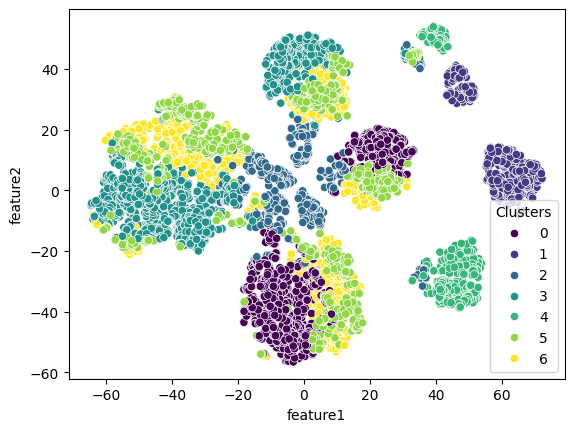

In [91]:
sns.scatterplot(tsne_2dP_da_df, x = 'feature1', y = 'feature2', hue = 'Clusters', palette = 'viridis')

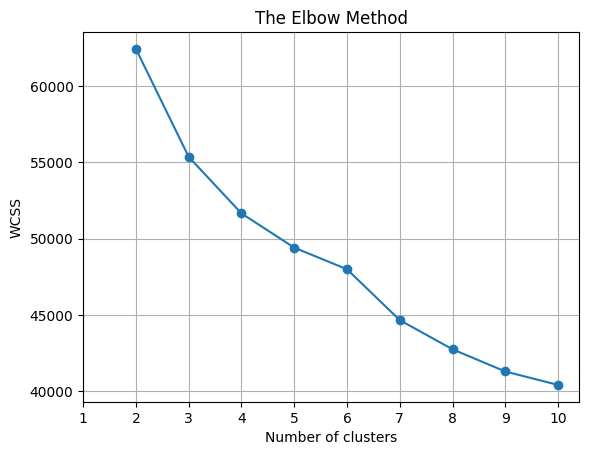

In [92]:
wcss_list = [] # creating empthy list to store wcss results for different number of clusters

for i in range(2, 11):
  clusterer = KMeans(n_clusters = i, random_state = RS)
  clusterer.fit(scaled_data)
  wcss_list.append(clusterer.inertia_)

plt.plot(range(2, 11), wcss_list, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


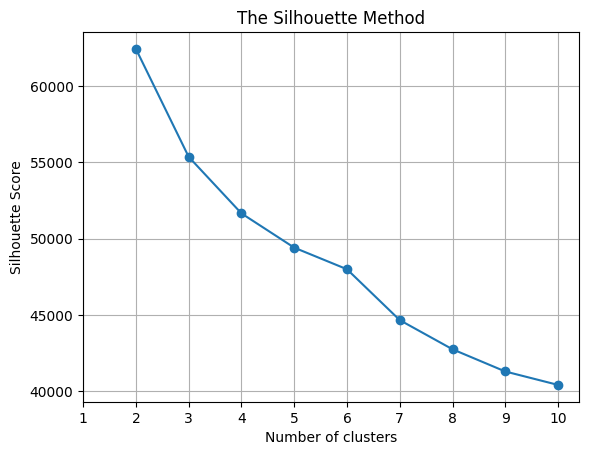

In [124]:
sil_list = []  # creating empthy list to store silhoutte score results for different number of clusters

for i in range(2, 11):
  clusterer = KMeans(n_clusters = i, random_state = RS)
  clusterer.fit(scaled_data)
  #wcss_list.append(clusterer.inertia_)
  score = silhouette_score(scaled_data, clusterer.labels_)
  sil_list.append(score)

plt.plot(range(2, 11), wcss_list, marker = 'o')
plt.title('The Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

- Based on the analysis of both the WCSS and Silhouette score plots, we can see that sharp drops on K=4 seems to be a better value than K=7, i.e., we should try building 4 clusters.

In [94]:
n_clstr =4
kmeans_4 = KMeans(n_clusters = n_clstr, random_state = RS)
kmeans_4.fit(scaled_data)

KMeans(n_clusters=4, random_state=0)

In [95]:
tsne_2dP_da_df['Clusters'] = kmeans_4.labels_
tsne_2dP_da_df.head()

feature1   feature2  Clusters
0  41.735905 -23.232224         0
1  48.176819 -24.671427         0
2   4.645884 -24.529943         0
3   5.251717 -17.230087         0
4  20.459995  -4.156707         0

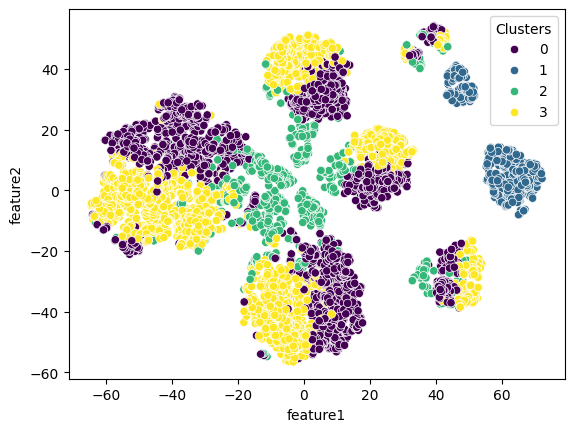

In [96]:
sns.scatterplot(tsne_2dP_da_df, x='feature1', y='feature2', hue='Clusters', palette='viridis');

- While K=3 seems to be the optimal number from the Elbow method and considering silhouette scores, most clusters seems to be separable into many.
    - We might be able to better distinguish between clusters this way.

- As such, we'll proceed forward with 4 clusters, even though it has a lower silhouette score.
   

## Cluster Profiling

In [97]:
data['Clusters'] = kmeans_4.labels_
data.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49       91       4    1.6          1         0   
1   2   45          19      34       90       3    1.5          1         0   
2   3   39          15      11       94       1    1.0          1         0   
3   4   35           9     100       94       1    2.7          2         0   
4   5   35           8      45       91       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  Clusters  
0              0                   1           0       0           0         0  
1              0                   1           0       0           0         0  
2              0                   0           0       0           0         0  
3              0                   0           0       0           0         0  
4              0                   0           0       0           1         0

In [98]:
data.tail()


ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40       92       1    1.9          3   
4996  4997   30           4      15       92       4    0.4          1   
4997  4998   63          39      24       93       2    0.3          3   
4998  4999   65          40      49       90       3    0.5          2   
4999  5000   28           4      83       92       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  Clusters  
4995           0         0  
4996           0         0  
4997           0         3  
4998           0         3  
4999           1         0

Clusters
3    39.06
0    37.92
2    13.42
1     9.60
Name: proportion, dtype: float64 



Text(0.5, 1.0, 'Distribution Of The Clusters')

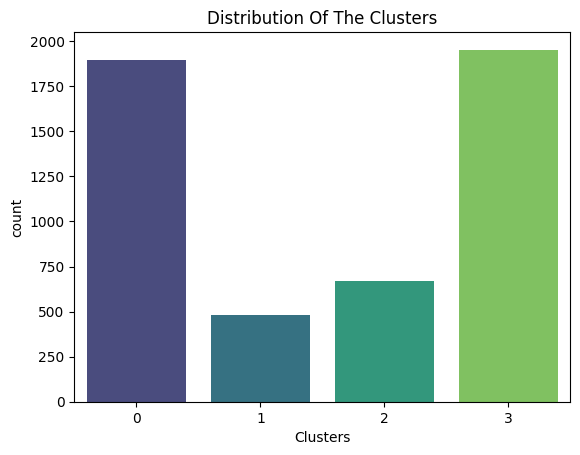

In [99]:
print(
    100 * data['Clusters'].value_counts(normalize = True), '\n'
)
sns.countplot(data = data, x = 'Clusters', palette = 'viridis').set_title("Distribution Of The Clusters")

- Most of the data points are belong to cluster 0 and 3

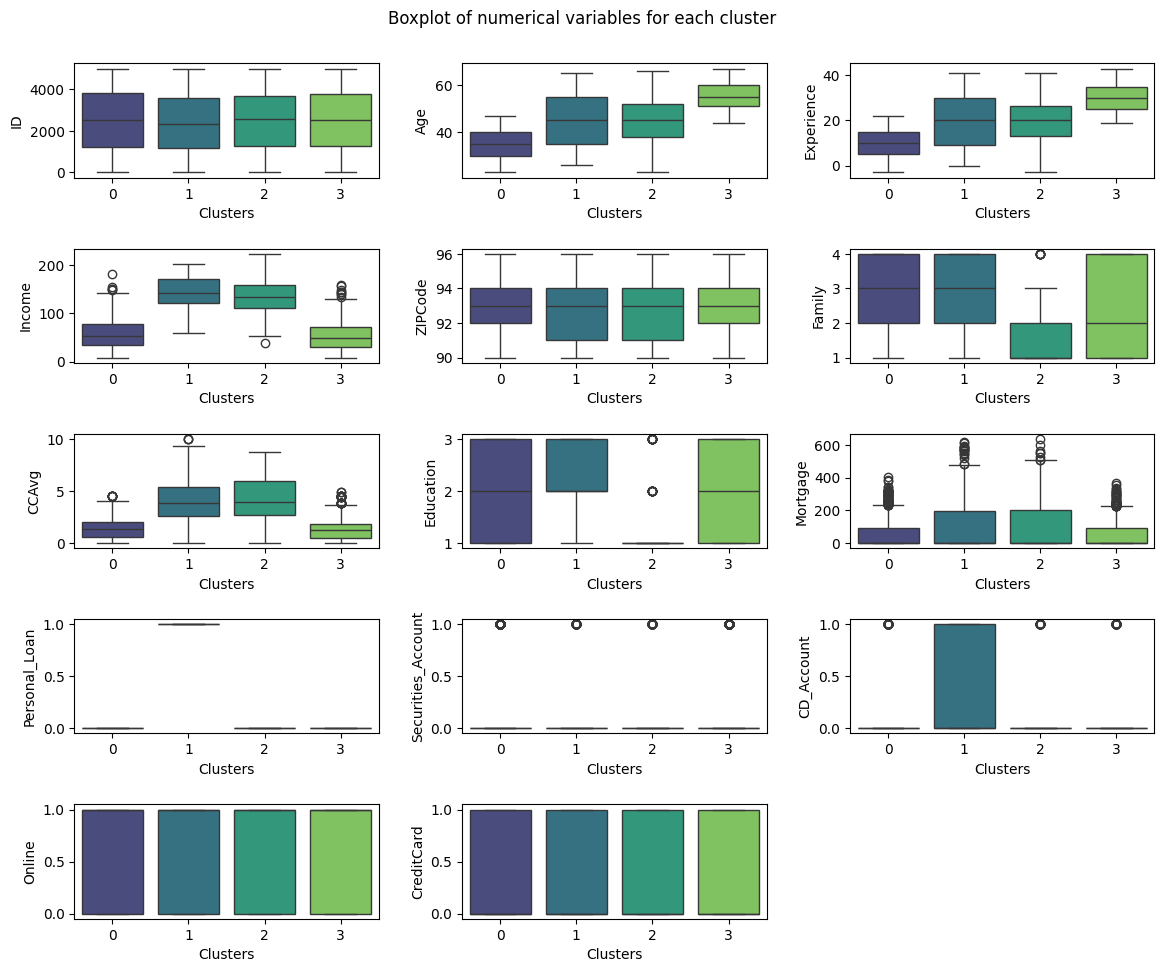

In [100]:
plt.figure(figsize = (12, 10))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, vari in enumerate(data.columns.to_list()[:-1]):
  plt.subplot(5, 3, i + 1)
  sns.boxplot(data = data, x = 'Clusters', y = vari, palette = 'viridis')

plt.tight_layout(pad = 2.0)

## Actionable Insights and Business Recommendations

Cluster 0:

- The customers in this cluster have the second highest average income of ~$55k.
- These customers also mixed graduates and not.
- The customers have a small family size of above 2.
- These customers have lowest average of age and experience.
- They mostly not purchase personal loan.

Cluster 3:

- The customers in this cluster have the second highest average income of ~$50k.
- These customers also mixed graduates and not.
- The customers have a family size of up to 4.
- These customers have highest average of age and experience.
- They mostly not purchase personal loan.

Cluster 2:

- The customers in this cluster have the second highest average income of ~$120k.
- These customers also undergraduates.
- The customers have a family size of up to 2.
- They mostly not purchase personal loan.

Cluster 1:

- The customers in this cluster have the highest average income of ~$150k.
- These customers also graduataes.
- The customers have a small family size of above 2.
- The customers have CD_Account(certificate of deposit)
- They mostly purchase personal loan.


So it's better working to maintain cluster 1 customers and more effort on cluster 2 customers as they have high probablity of going to purchase personal loan with giving deep awarness and knowledge.


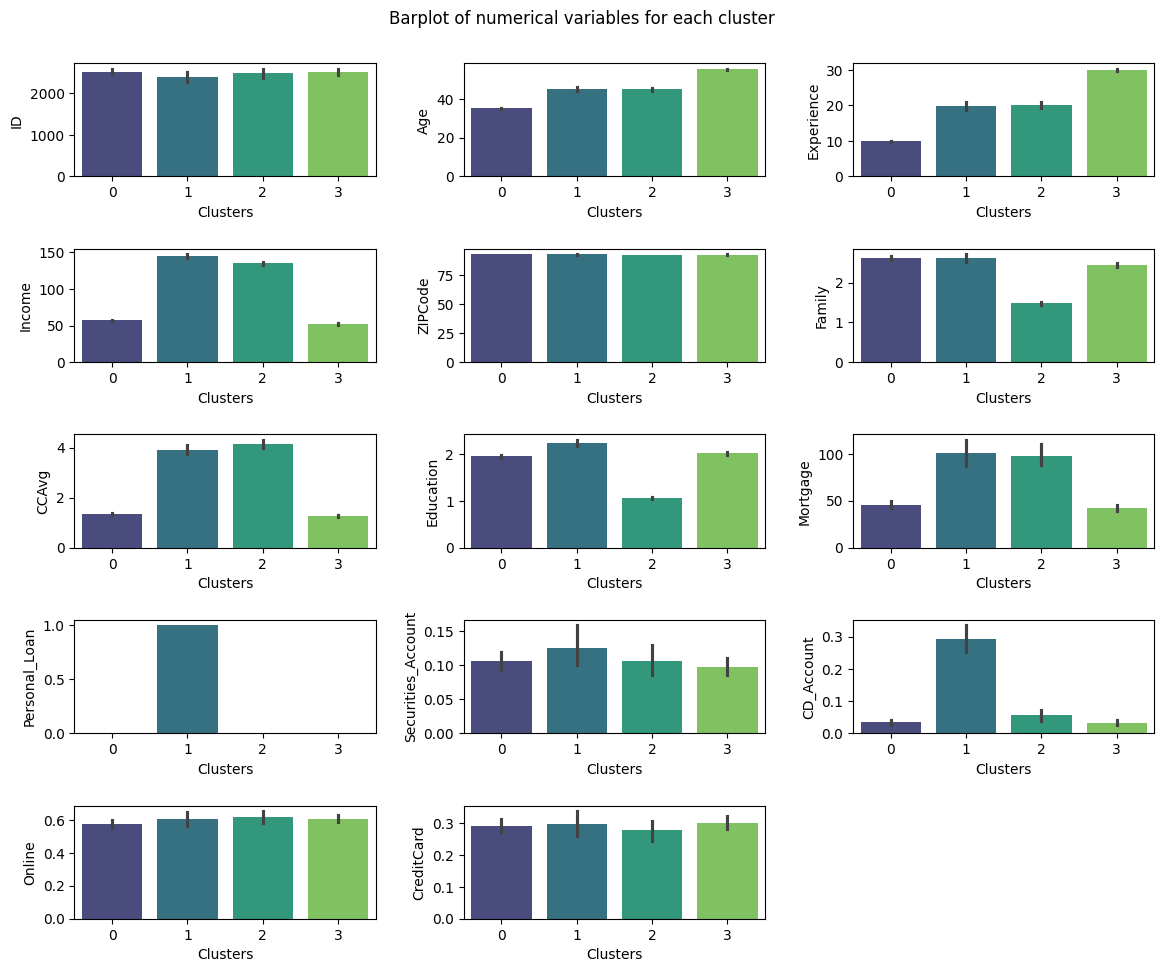

In [101]:
plt.figure(figsize = (12, 10))
plt.suptitle("Barplot of numerical variables for each cluster")

for i, vari in enumerate(data.columns.to_list()[:-1]):
  plt.subplot(5, 3, i + 1)
  sns.barplot(data = data, x = 'Clusters', y = vari, palette = 'viridis')

plt.tight_layout(pad = 2.0)